### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

sns.set(rc={'figure.figsize':(16,6)})
pd.set_option('display.max_columns', 50)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

### Assessing Data

In [2]:
fraud = pd.read_csv('fraud_test.csv')

In [3]:
fraud.head()

Unnamed: 0 trans_date_trans_time        cc_num  \
0           0      21/06/2020 12:14  2.291160e+15   
1           1      21/06/2020 12:14  3.573030e+15   
2           2      21/06/2020 12:14  3.598220e+15   
3           3      21/06/2020 12:15  3.591920e+15   
4           4      21/06/2020 12:15  3.526830e+15   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  19/03/1968   
1  40.3207 -110.4360       302  Sales professional, IT  17/01/1990   
2  40.6729  -73.5365     34496       Librarian, public  21/10/1970   
3  28.5697  -80.8191     54767            Set designer  25/07/1987   
4  44.2529  -85.0170      1126      Furniture designer  06/07/1955   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [4]:
fraud.drop(fraud.columns[0], axis=1, inplace=True)

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [6]:
# Checking the feature types
print(f"This dataset contains {fraud.select_dtypes(include=['object']).shape[1]} categorical features and {fraud.select_dtypes(include=['int', 'float']).shape[1]} numerical features, it also contains {fraud.shape[0]} rows")

This dataset contains 12 categorical features and 10 numerical features, it also contains 555719 rows


#### Summary Statistics

In [7]:
# Numerical
fraud.describe()

cc_num            amt            zip            lat  \
count  5.557190e+05  555719.000000  555719.000000  555719.000000   
mean   4.178387e+17      69.392810   48842.628015      38.543253   
std    1.309837e+18     156.745941   26855.283328       5.061336   
min    6.041621e+10       1.000000    1257.000000      20.027100   
25%    1.800430e+14       9.630000   26292.000000      34.668900   
50%    3.521420e+15      47.290000   48174.000000      39.371600   
75%    4.635330e+15      83.010000   72011.000000      41.894800   
max    4.992350e+18   22768.110000   99921.000000      65.689900   

                long      city_pop     unix_time      merch_lat  \
count  555719.000000  5.557190e+05  5.557190e+05  555719.000000   
mean      -90.231325  8.822189e+04  1.380679e+09      38.542798   
std        13.721780  3.003909e+05  5.201104e+06       5.095829   
min      -165.672300  2.300000e+01  1.371817e+09      19.027422   
25%       -96.798000  7.410000e+02  1.376029e+09      34.755302   
50%       -87.476900  2.408000e+03  1.380762e+09      39.376593   
75%       -80.175200  1.968500e+04  1.385867e+09      41.954163   
max       -67.950300  2.906700e+06  1.388534e+09      66.679297   

          merch_long       is_fraud  
count  555719.000000  555719.000000  
mean      -90.231380       0.003860  
std        13.733071       0.062008  
min      -166.671575       0.000000  
25%       -96.905129       0.000000  
50%       -87.445204       0.000000  
75%       -80.264637       0.000000  
max       -66.952026       1.000000

In [8]:
fraud['zip'] =fraud['zip'].astype(object)

In [9]:
# Categorical
fraud.describe(include="object")

trans_date_trans_time           merchant       category        first  \
count                 555719             555719         555719       555719   
unique                226976                693             14          341   
top         15/12/2020 21:26  fraud_Kilback LLC  gas_transport  Christopher   
freq                      16               1859          56370        11443   

          last  gender           street        city   state     zip  \
count   555719  555719           555719      555719  555719  555719   
unique     471       2              924         849      50     912   
top      Smith       F  444 Robert Mews  Birmingham      TX   82514   
freq     12146  304886             1474        2423   40393    1589   

                      job         dob                         trans_num  
count              555719      555719                            555719  
unique                478         910                            555719  
top     Film/video editor  23/03/1977  2da90c7d74bd46a0caf3777415b3ebd3  
freq                 4119        2408                                 1

### Preprocessing (Data Preparation)

#### Temporal Features

In [10]:
# Convert transaction date and dob to datetime datatype
fraud["trans_date_trans_time"] = pd.to_datetime(fraud["trans_date_trans_time"])


In [11]:
# Etracting calendar variables
month_names = { 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
day_names = { 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

In [12]:
# Extract date, month, weekday, and hour from transaction time
fraud['hour_of_day'] = fraud['trans_date_trans_time'].dt.hour
fraud['date'] = fraud['trans_date_trans_time'].dt.date
fraud['month_no'] = fraud['trans_date_trans_time'].dt.month
fraud['weekday_no'] = fraud['trans_date_trans_time'].dt.weekday
fraud['week_of_year'] = fraud['trans_date_trans_time'].dt.isocalendar().week
fraud['month'] = fraud['trans_date_trans_time'].dt.month.map(month_names)
fraud['weekday'] = fraud['trans_date_trans_time'].dt.weekday.map(day_names)


# Function to determine time of the day
def time_of_day(hour):
    if hour >= 6 and hour < 18:
        return 'Day'
    else:
        return 'Night'

# Apply the function to create 'time_of_day' column
fraud['time_of_day'] = fraud['hour_of_day'].apply(time_of_day)

In [13]:
fraud['date'] = pd.to_datetime(fraud['date'])

In [14]:
# Calculate time difference between consecutive transactions for the same customer
fraud = fraud.sort_values(by=['cc_num', 'trans_date_trans_time'])
fraud['time_diff'] = fraud.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()

#### Social features

In [15]:
# Calculate cardholder's age
fraud['dob'] = pd.to_datetime(fraud['dob'])
fraud['age'] = (fraud['trans_date_trans_time'] - fraud['dob']).dt.days // 365
fraud['age'].sort_values().unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96],
      dtype=int64)

In [16]:
# Age levels
bin_ages = [13,19,40,70, 100]
bin_labels = ['teenagers', 'young_adult', 'adults', 'elders']
fraud['age_levels'] = pd.cut(fraud['age'], bin_ages, labels=bin_labels)

In [17]:
# Creation of previous fraud transaction flag
fraud['full_name'] = fraud['first'] + ' ' + fraud['last']
min_date_of_fraud = fraud[fraud['is_fraud'] == 1].groupby('full_name')['trans_date_trans_time'].min().reset_index()

In [18]:
# Merge back to the original DataFrame
fraud = pd.merge(fraud, min_date_of_fraud, on='full_name', how='left', suffixes=('', '_min_fraud'))

# Create a 'previous_fraud' column
fraud['previous_fraud'] = 0
fraud.loc[fraud['trans_date_trans_time'] > fraud['trans_date_trans_time_min_fraud'], 'previous_fraud'] = 1

# Drop the temporary column used for the merge
fraud.drop(columns=['trans_date_trans_time_min_fraud'], inplace=True)

In [19]:
# Creation of Number of transactions of customer
fraud['num_of_transactions'] = fraud.groupby('full_name').cumcount() + 1

In [20]:
# Example for a better transaction density metric
fraud['daily_transactions'] = fraud.groupby('full_name')['trans_date_trans_time'].transform(lambda x: x.dt.date).nunique()
fraud['transactions_per_day'] = fraud['num_of_transactions'] / fraud['daily_transactions']

#### Spatial Features

In [21]:
from geopy.distance import geodesic

# Calculate distance from home to merchant
fraud['distance_as_crow_fly'] = fraud.apply(
    lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).km, axis=1)

#### Target Variable

In [22]:
# Change datatype
fraud["is_fraud"] = fraud["is_fraud"].astype("object")

In [23]:
# Drop unnecessary column
fraud.drop(columns=["zip", "unix_time", "trans_num",  "first", "last", "dob", "daily_transactions"], inplace=True)

In [24]:
# ALl datatype
fraud.describe(include="all")

trans_date_trans_time        cc_num           merchant       category  \
count                 555719  5.557190e+05             555719         555719   
unique                226976           NaN                693             14   
top      2020-01-12 19:01:00           NaN  fraud_Kilback LLC  gas_transport   
freq                      16           NaN               1859          56370   
first    2020-01-07 00:00:00           NaN                NaN            NaN   
last     2020-12-31 23:59:00           NaN                NaN            NaN   
mean                     NaN  4.178387e+17                NaN            NaN   
std                      NaN  1.309837e+18                NaN            NaN   
min                      NaN  6.041621e+10                NaN            NaN   
25%                      NaN  1.800430e+14                NaN            NaN   
50%                      NaN  3.521420e+15                NaN            NaN   
75%                      NaN  4.635330e+15                NaN            NaN   
max                      NaN  4.992350e+18                NaN            NaN   

                  amt  gender           street        city   state  \
count   555719.000000  555719           555719      555719  555719   
unique            NaN       2              924         849      50   
top               NaN       F  444 Robert Mews  Birmingham      TX   
freq              NaN  304886             1474        2423   40393   
first             NaN     NaN              NaN         NaN     NaN   
last              NaN     NaN              NaN         NaN     NaN   
mean        69.392810     NaN              NaN         NaN     NaN   
std        156.745941     NaN              NaN         NaN     NaN   
min          1.000000     NaN              NaN         NaN     NaN   
25%          9.630000     NaN              NaN         NaN     NaN   
50%         47.290000     NaN              NaN         NaN     NaN   
75%         83.010000     NaN              NaN         NaN     NaN   
max      22768.110000     NaN              NaN         NaN     NaN   

                  lat           long      city_pop                job  \
count   555719.000000  555719.000000  5.557190e+05             555719   
unique            NaN            NaN           NaN                478   
top               NaN            NaN           NaN  Film/video editor   
freq              NaN            NaN           NaN               4119   
first             NaN            NaN           NaN                NaN   
last              NaN            NaN           NaN                NaN   
mean        38.543253     -90.231325  8.822189e+04                NaN   
std          5.061336      13.721780  3.003909e+05                NaN   
min         20.027100    -165.672300  2.300000e+01                NaN   
25%         34.668900     -96.798000  7.410000e+02                NaN   
50%         39.371600     -87.476900  2.408000e+03                NaN   
75%         41.894800     -80.175200  1.968500e+04                NaN   
max         65.689900     -67.950300  2.906700e+06                NaN   

            merch_lat     merch_long  is_fraud    hour_of_day  \
count   555719.000000  555719.000000  555719.0  555719.000000   
unique            NaN            NaN       2.0            NaN   
top               NaN            NaN       0.0            NaN   
freq              NaN            NaN  553574.0            NaN   
first             NaN            NaN       NaN            NaN   
last              NaN            NaN       NaN            NaN   
mean        38.542798     -90.231380       NaN      12.809062   
std          5.095829      13.733071       NaN       6.810924   
min         19.027422    -166.671575       NaN       0.000000   
25%         34.755302     -96.905129       NaN       7.000000   
50%         39.376593     -87.445204       NaN      14.000000   
75%         41.954163     -80.264637       NaN      19.000000   
max         66.679297     -66.952026 

Transaction period between 7th January 2020 to 31st of December 2020 (12 months period) 

In [25]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  float64       
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   gender                 555719 non-null  object        
 6   street                 555719 non-null  object        
 7   city                   555719 non-null  object        
 8   state                  555719 non-null  object        
 9   lat                    555719 non-null  float64       
 10  long                   555719 non-null  float64       
 11  city_pop               555719 non-null  int64         
 12  job                    555719 non-null  obje

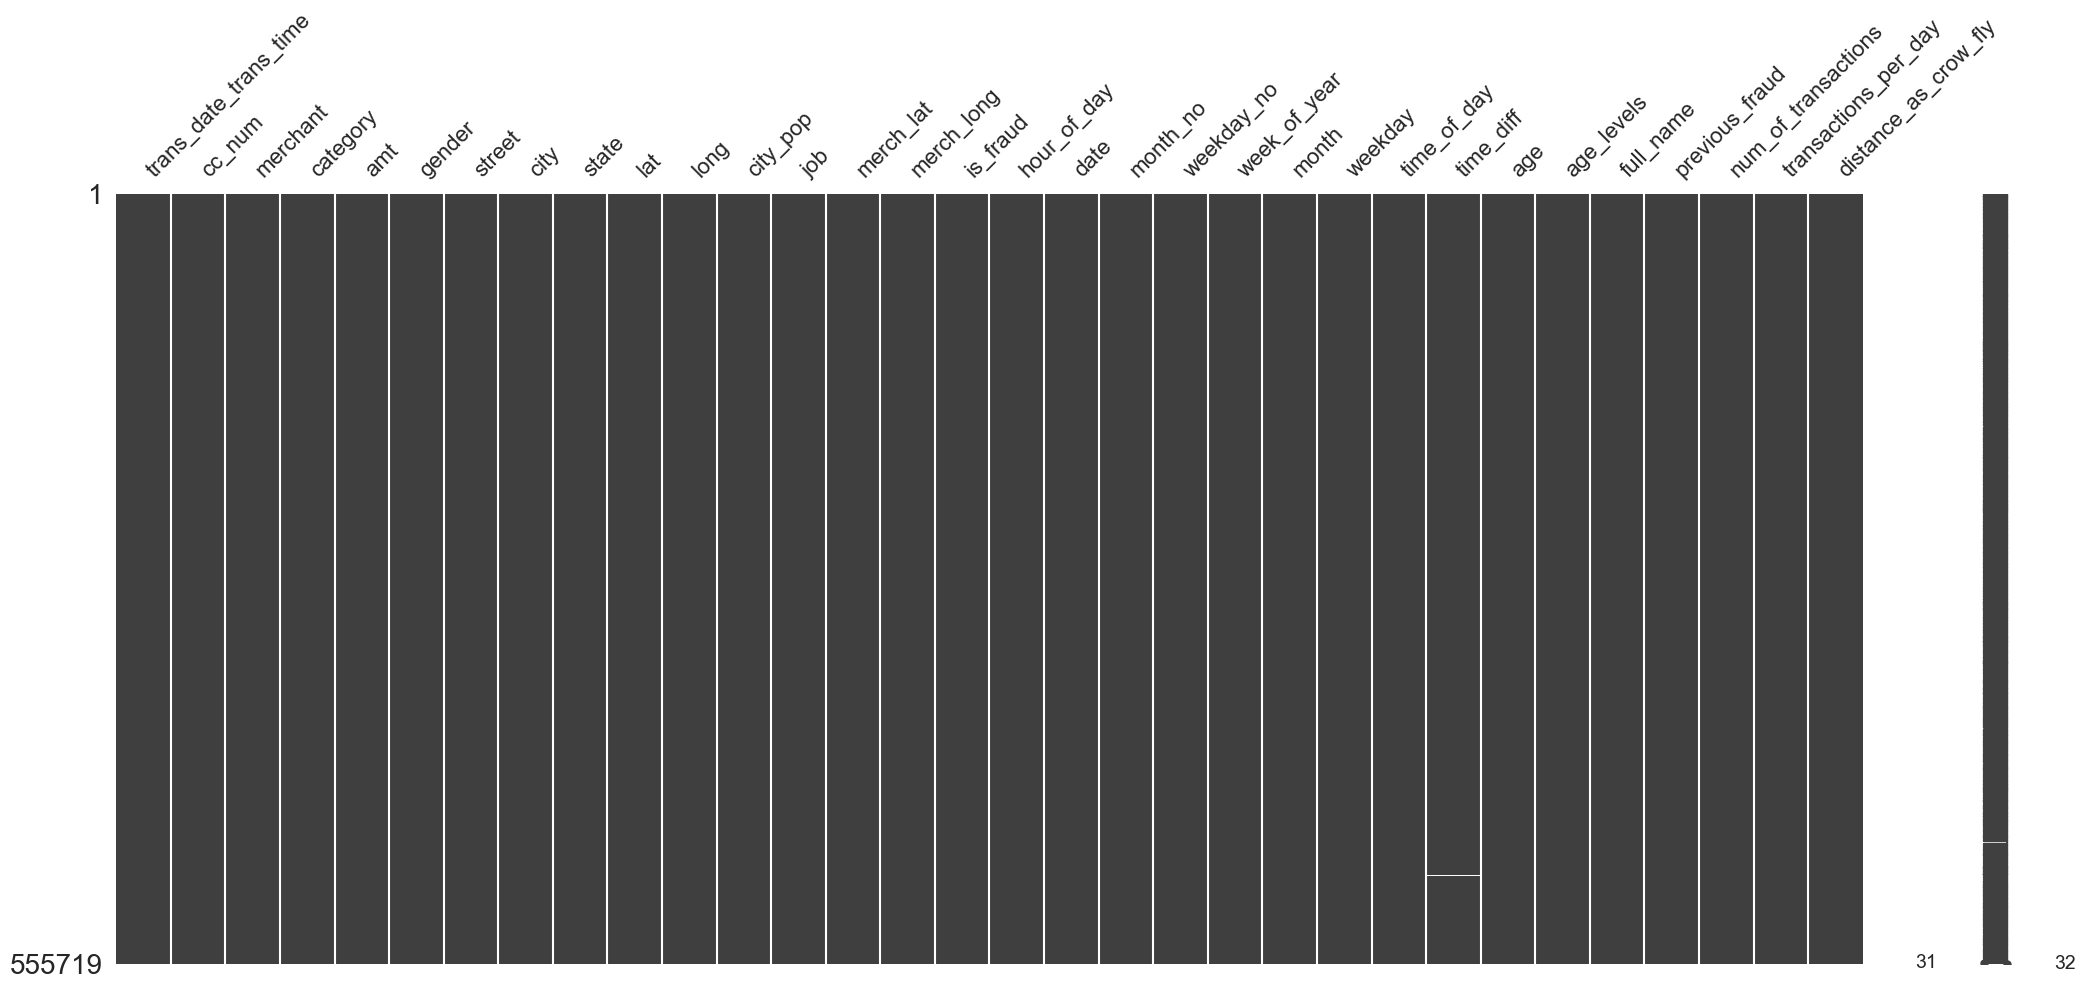

In [26]:
import missingno as msno

# Visualize missing data
msno.matrix(fraud);

In [27]:
fraud['time_diff'] = fraud['time_diff'].fillna(fraud['time_diff'].mean())

In [28]:
fraud['time_diff'].isnull().sum()

0

In [29]:
fraud.duplicated().sum()

0

In [30]:
fraud.head()

trans_date_trans_time        cc_num                           merchant  \
0   2020-01-07 18:05:00  6.041621e+10               fraud_Jast-McDermott   
1   2020-01-07 18:14:00  6.041621e+10               fraud_Sporer-Keebler   
2   2020-01-07 21:23:00  6.041621e+10            fraud_Gaylord-Powlowski   
3   2020-01-07 21:28:00  6.041621e+10             fraud_Volkman-Predovic   
4   2020-01-08 03:51:00  6.041621e+10  fraud_Schultz, Simonis and Little   

        category    amt gender            street           city state  \
0   shopping_pos   9.33      F  9886 Anita Drive  Fort Washakie    WY   
1  personal_care   1.79      F  9886 Anita Drive  Fort Washakie    WY   
2           home  14.65      F  9886 Anita Drive  Fort Washakie    WY   
3   shopping_net   8.82      F  9886 Anita Drive  Fort Washakie    WY   
4    grocery_pos  92.26      F  9886 Anita Drive  Fort Washakie    WY   

       lat      long  city_pop                          job  merch_lat  \
0  43.0048 -108.8964      1645  Information systems manager  43.534230   
1  43.0048 -108.8964      1645  Information systems manager  43.013767   
2  43.0048 -108.8964      1645  Information systems manager  42.025461   
3  43.0048 -108.8964      1645  Information systems manager  43.074086   
4  43.0048 -108.8964      1645  Information systems manager  42.104826   

   merch_long is_fraud  hour_of_day       date  month_no  weekday_no  \
0 -108.039394        0           18 2020-01-07         1           1   
1 -108.926964        0           18 2020-01-07         1           1   
2 -108.876771        0           21 2020-01-07         1           1   
3 -109.356660        0           21 2020-01-07         1           1   
4 -109.108232        0            3 2020-01-08         1           2   

   week_of_year    month  weekday time_of_day     time_diff  age   age_levels  \
0             2  January   Monday       Night  49764.572515   33  young_adult   
1             2  January   Monday       Night    540.000000   33  young_adult   
2             2  January   Monday       Night  11340.000000   33  young_adult   
3             2  January   Monday       Night    300.000000   33  young_adult   
4             2  January  Tuesday       Night  22980.000000   33  young_adult   

   full_name  previous_fraud  num_of_transactions  transactions_per_day  \
0  Mary Diaz               0                    1              0.005155   
1  Mary Diaz               0                    2              0.010309   
2  Mary Diaz               0                    3              0.015464   
3  Mary Diaz               0                    4              0.020619   
4  Mary Diaz               0                    5              0.025773   

   distance_as_crow_fly  
0             91.105025  
1              2.683586  
2            108.800164  
3             38.287667  
4            101.475095

In [31]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  float64       
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   gender                 555719 non-null  object        
 6   street                 555719 non-null  object        
 7   city                   555719 non-null  object        
 8   state                  555719 non-null  object        
 9   lat                    555719 non-null  float64       
 10  long                   555719 non-null  float64       
 11  city_pop               555719 non-null  int64         
 12  job                    555719 non-null  obje

In [32]:
# Checking the feature types
print(f"After preprocessing, dataset contains {fraud.select_dtypes(include=['object']).shape[1]} categorical features, {fraud.select_dtypes(include=['int', 'float']).shape[1]} numerical features,and {fraud.select_dtypes(include=['datetime']).shape[1]} date features")

After preprocessing, dataset contains 12 categorical features, 16 numerical features,and 2 date features


## EDA

#### Target variable

In [33]:
dict_ = {0:'legitimate', 1:'fraudulent'}
fraud['is_fraud'].replace(dict_, inplace = True)

In [34]:
# Inestigating the target variable
fraud['is_fraud'].value_counts()

legitimate    553574
fraudulent      2145
Name: is_fraud, dtype: int64

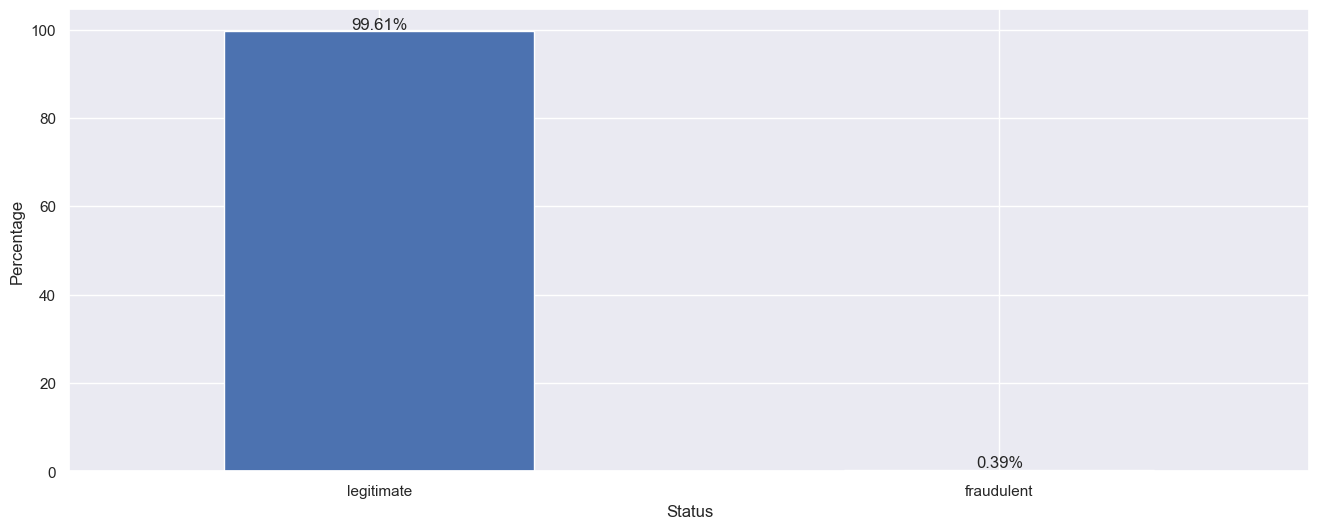

In [35]:
percentages = round(fraud['is_fraud'].value_counts(normalize=True)*100,2)
ax = percentages.plot(kind='bar', xlabel='Status', ylabel='Percentage',  rot=0)

# Display percentages on the y-axis
for idx, value in enumerate(percentages):
    ax.text(idx, value + 0.5, f'{value:.2f}%', ha='center')

# Save Image
plt.savefig("status.png", dpi=150)

From the plot above, it can be observed that the target variable is highly unbalanced

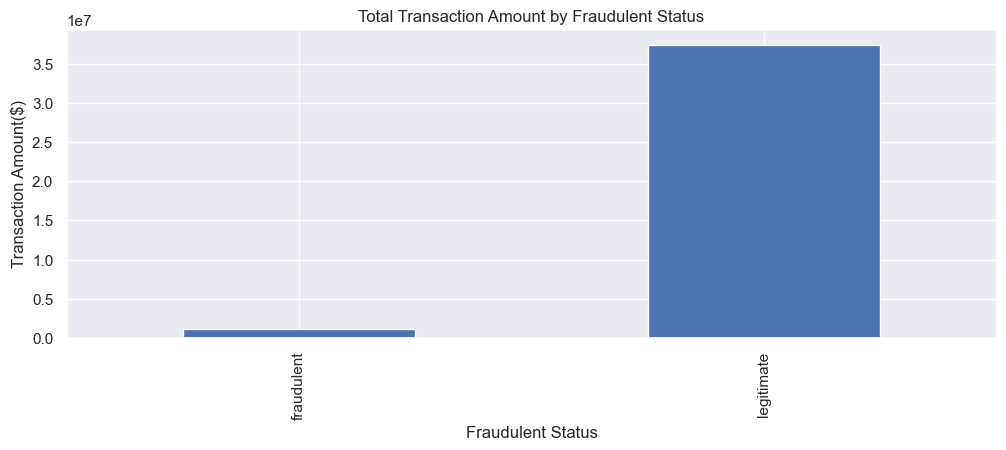

In [36]:
fraud.groupby('is_fraud')['amt'].sum().sort_values(ascending=True).plot.bar(figsize=(12,4), title="Total Transaction Amount by Fraudulent Status")
plt.xlabel("Fraudulent Status")
plt.ylabel("Transaction Amount($)");

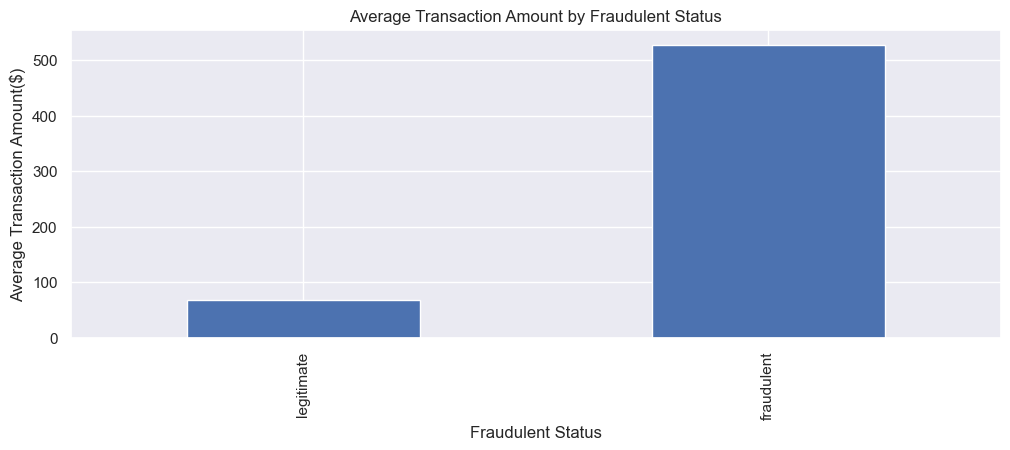

In [37]:
fraud.groupby('is_fraud')['amt'].mean().sort_values(ascending=True).plot.bar(figsize=(12,4), title="Average Transaction Amount by Fraudulent Status")
plt.xlabel("Fraudulent Status")
plt.ylabel("Average Transaction Amount($)");

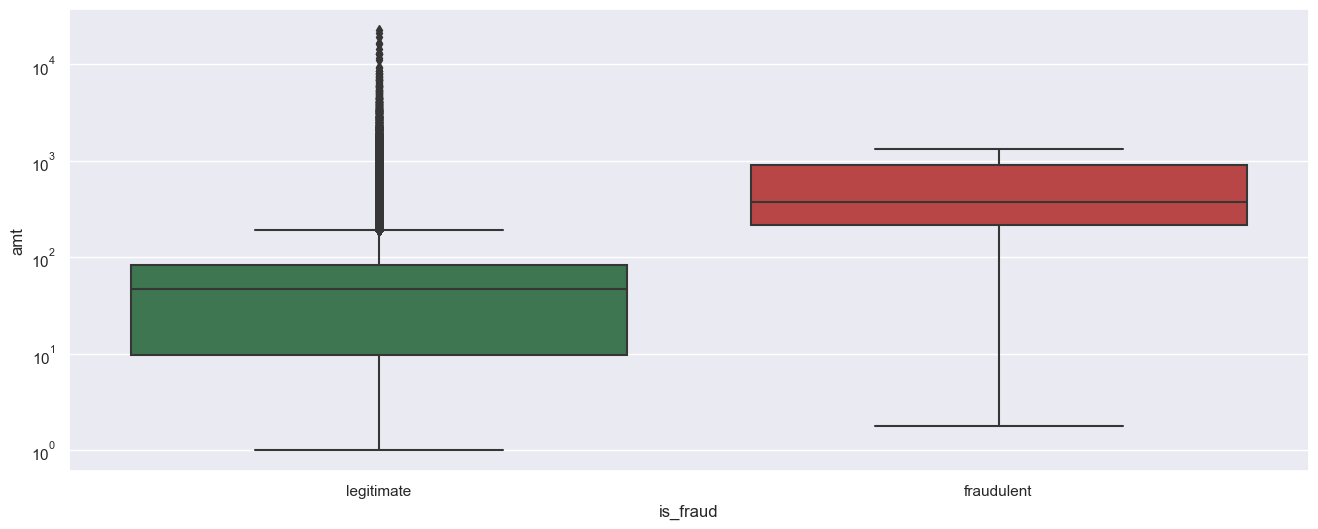

In [38]:
custom_palette2 = sns.color_palette([(0.2, 0.5, 0.3), (0.8, 0.2, 0.2)])
sns.boxplot(x='is_fraud', y='amt', data=fraud, palette=custom_palette2)
plt.yscale('log');
# Save Image
plt.savefig("Tranactiion Amount b status.png", dpi=150)

#### City Population 

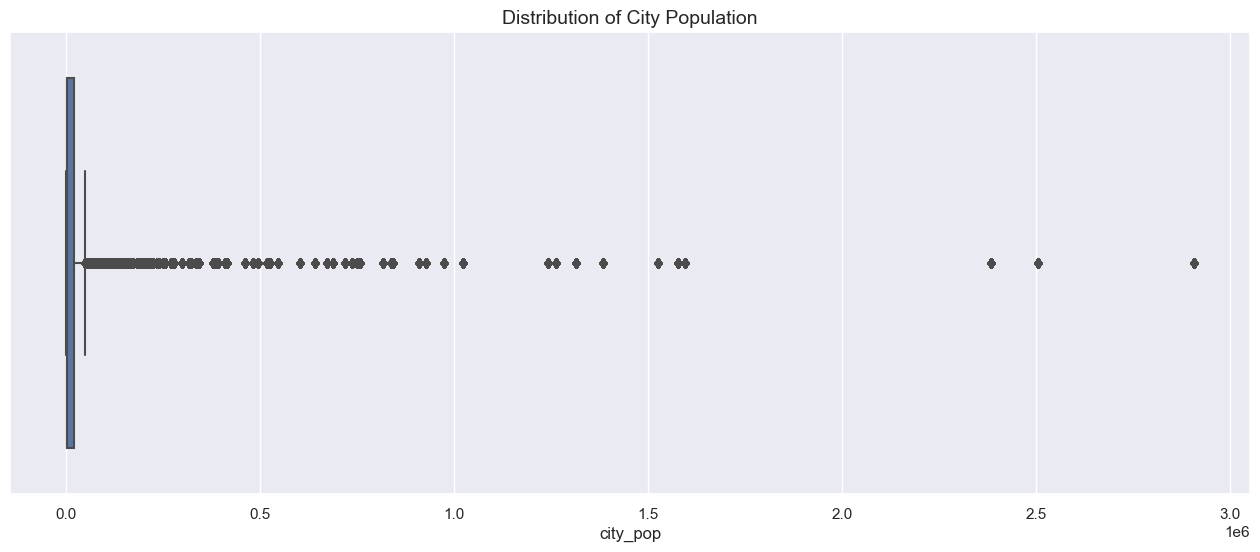

In [39]:
sns.boxplot(x=fraud['city_pop'], color=sns.color_palette()[0], orient='v')
plt.title('Distribution of City Population', size=14);
plt.savefig("CityPop.png", dpi=150)

#### Transaction Amount

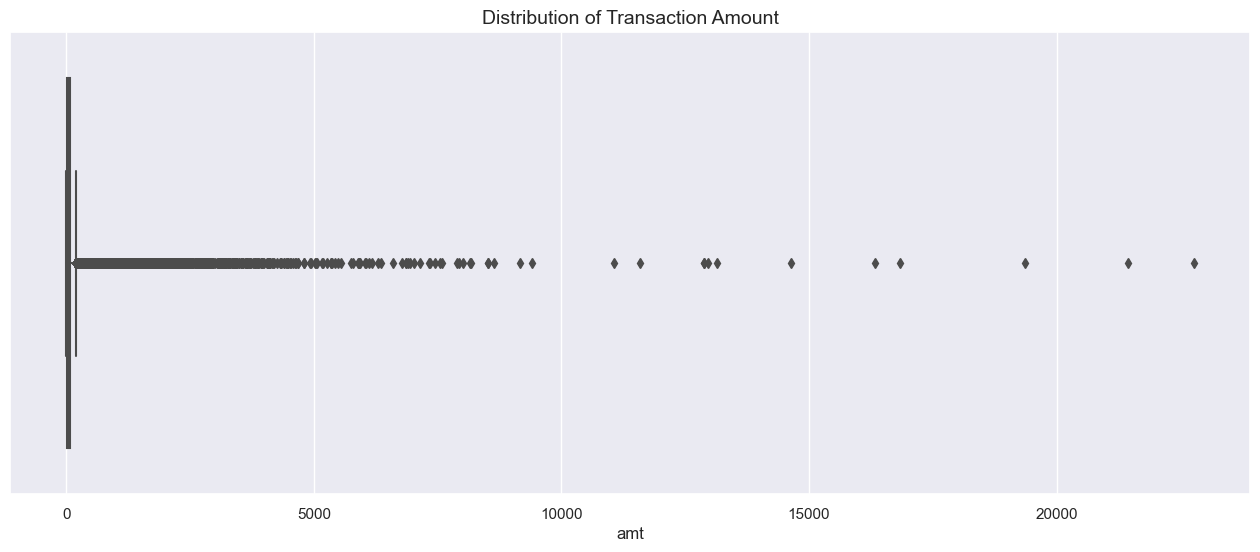

In [40]:
sns.boxplot(x=fraud['amt'], color=sns.color_palette()[0], orient='v')
plt.title('Distribution of Transaction Amount', size=14);
plt.savefig("Amount.png", dpi=150)

## Social Features
- Age,
- job
- previous fraud count,
- gender,
- age category,
- transaction category.

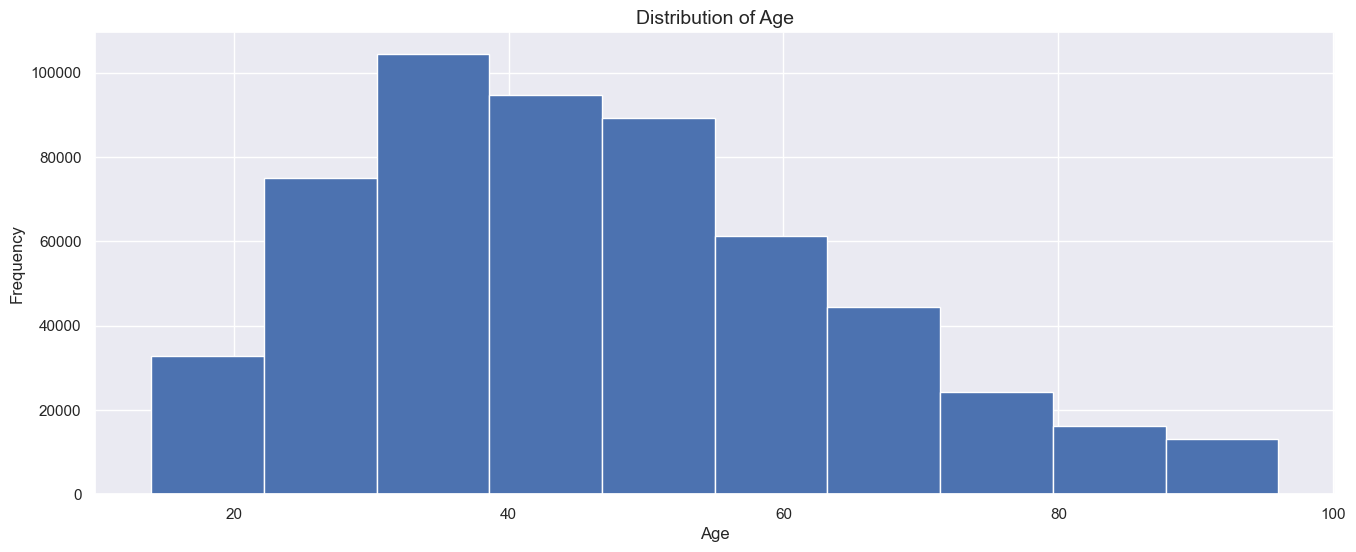

In [41]:
# Plot Age Distribution
fraud['age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(f'Distribution of Age', size=14);
plt.savefig("Age.png", dpi=150)

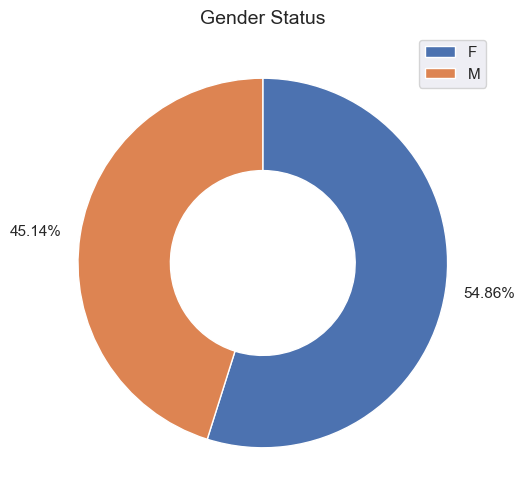

In [42]:
# Gender
gendercount = round(fraud['gender'].value_counts(normalize=True)*100,2)
plt.pie(gendercount, labels=[f"{str(x)}%" for x in gendercount.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});
plt.title('Gender Status', fontsize=14)
plt.legend(gendercount.index);
plt.savefig("Gender.png", dpi=150)

In [43]:
# Fraudulent activities by Age levels
pd.crosstab(index=fraud['is_fraud'], columns=fraud['age_levels']).sort_values(by='fraudulent', axis=1, ascending=False)

age_levels  adults  young_adult  elders  teenagers
is_fraud                                          
fraudulent    1092          784     257         12
legitimate  265346       220841   57619       9768

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_20_entities(fraud, entity_column, title, file_name, y_scale='log'):
    """
    Generate bar plots for the top 20 entities with the highest number of fraudulent transactions, categorized by fraudulent status.

    Parameters:
    fraud (DataFrame): The DataFrame containing transaction data.
    entity_column (str): The column name of the entity to analyze (e.g., 'city', 'street', 'merchant', 'job').
    title (str): The title of the plot.
    file_name (str): The file name to save the plot as a PNG file.

    Returns:
    None
    """
    # Calculate the number of fraudulent transactions for each entity
    fraud_transaction_count = fraud[fraud['is_fraud'] == 'fraudulent'].groupby(entity_column).size().reset_index(name='fraud_transactions')

    # Identify the top 20 entities with the highest number of fraudulent transactions
    top_20_entities = fraud_transaction_count.nlargest(20, 'fraud_transactions')[entity_column]

    # Filter the data to include only transactions from the top 20 entities
    top_20_fraud = fraud[fraud[entity_column].isin(top_20_entities)]

    # Group by entity and fraudulent status, and count the number of transactions
    entity_count = top_20_fraud.groupby([entity_column, 'is_fraud']).size().reset_index(name='transaction_count')

    # Sort entities by the number of fraudulent transactions
    sorted_entities = fraud_transaction_count.nlargest(20, 'fraud_transactions')[entity_column]

    # Reduce the length of entity labels to the first 10 characters
    entity_count[entity_column] = entity_count[entity_column].str[:15]
    sorted_entities = sorted_entities.str[:15]

    # Define the custom color palette
    custom_palette = sns.color_palette(["red", "green"])

    # Create a bar plot with sorted entities
    sns.barplot(x=entity_column, y='transaction_count', hue='is_fraud', data=entity_count, palette=custom_palette, ci=None, order=sorted_entities)

    # Add labels and title
    plt.xlabel(entity_column.capitalize())
    plt.ylabel('Number of Transactions')
    plt.yscale(y_scale)
    # plt.title(title, size=14)

    # Adjust layout
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(file_name, dpi=150)

    # Show the plot
    plt.show()

# Example usage:
# plot_top_20_entities(fraud, 'merchant', 'Top 20 Merchants by Fraudulent Transactions', 'top_20_merchants_fraud.png')


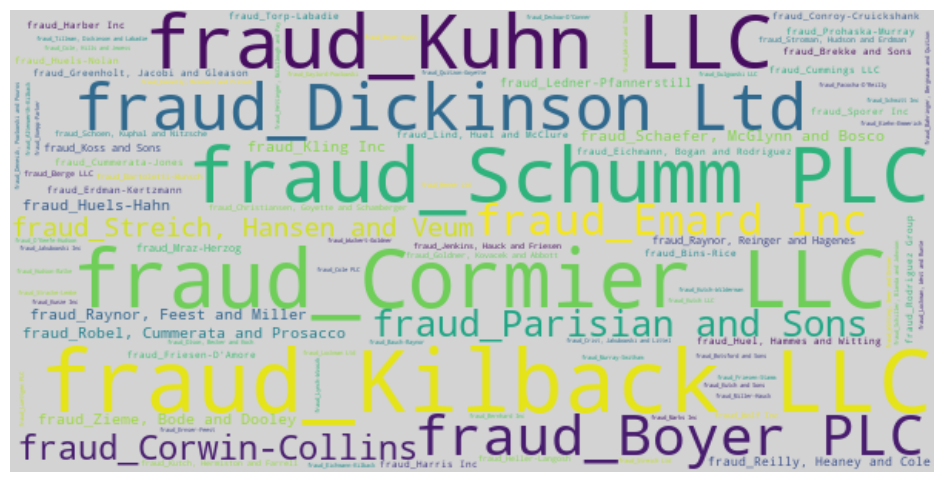

In [45]:
# Create a word cloud from the product_brand column
wordcloud = WordCloud(width=600, height=300,  background_color='lightgray').generate_from_frequencies(fraud['merchant'].value_counts())

# Create a plot to display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

plt.savefig("Merchant_Chart.png", dpi=150)

In [46]:
# Fraudulent activities by Merchant
merchant_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['merchant']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
merchant_proportion = merchant_crosstab.div(merchant_crosstab.sum(axis=1), axis=0)
merchant_proportion

merchant    fraud_Romaguera, Cruickshank and Greenholt  fraud_Lemke-Gutmann  \
is_fraud                                                                      
fraudulent                                    0.008392             0.008392   
legitimate                                    0.001463             0.001479   

merchant    fraud_Mosciski, Ziemann and Farrell  \
is_fraud                                          
fraudulent                             0.008392   
legitimate                             0.001539   

merchant    fraud_Schultz, Simonis and Little  \
is_fraud                                        
fraudulent                           0.007925   
legitimate                           0.001756   

merchant    fraud_Heathcote, Yost and Kertzmann  fraud_Heathcote LLC  \
is_fraud                                                               
fraudulent                             0.007925             0.006993   
legitimate                             0.001469             0.001422   

merchant    fraud_Medhurst PLC  fraud_Miller-Hauck  fraud_Bashirian Group  \
is_fraud                                                                    
fraudulent            0.006993            0.006993               0.006993   
legitimate            0.001367            0.001906               0.001400   

merchant    fraud_Boyer PLC  fraud_Kilback LLC  \
is_fraud                                         
fraudulent         0.006993           0.006993   
legitimate         0.002693           0.003331   

merchant    fraud_Huel, Hammes and Witting  fraud_Kuhic LLC  fraud_Kiehn Inc  \
is_fraud                                                                       
fraudulent                        0.006527         0.006527         0.006527   
legitimate                        0.001998         0.001523         0.001805   

merchant    fraud_Altenwerth, Cartwright and Koss  fraud_Auer-West  \
is_fraud                                                             
fraudulent                               0.006527         0.006061   
legitimate                               0.001512         0.001613   

merchant    fraud_Wolf Inc  fraud_Cole PLC  fraud_Kunze Inc  \
is_fraud                                                      
fraudulent        0.006061        0.006061         0.006061   
legitimate        0.001973        0.001917         0.001922   

merchant    fraud_Boyer-Reichert  fraud_Terry-Huel  \
is_fraud                                             
fraudulent              0.006061          0.006061   
legitimate              0.001550          0.001545   

merchant    fraud_Moen, Reinger and Murphy  \
is_fraud                                     
fraudulent                        0.006061   
legitimate                        0.001810   

merchant    fraud_Langworth, Boehm and Gulgowski  fraud_O'Keefe-Hudson  \
is_fraud                                                                 
fraudulent                              0.006061              0.006061   
legitimate                              0.001508              0.001949   

merchant    fraud_Strosin-Cruickshank  ...  fraud_Streich Ltd  \
is_fraud                               ...                      
fraudulent                   0.005594  ...           0.000000   
legitimate                   0.001781  ...           0.001922   

merchant    fraud_Bogisich-Weimann  fraud_Heller-Abshire  fraud_Bode-Rempel  \
is_fraud                                                                      
fraudulent                0.000000              0.000000           0.000000   
legitimate                0.001714              0.000683           0.001852   

merchant    fraud_Schuppe LLC  fraud_Schumm, McLaughlin and Carter  \
is_fraud                                                             
fraudulent           0.000000                             0.000000   
legitimate           0.001472                             0.001434   

merchant    fraud_Champlin, Rolfson and Connelly  \
is_fraud         

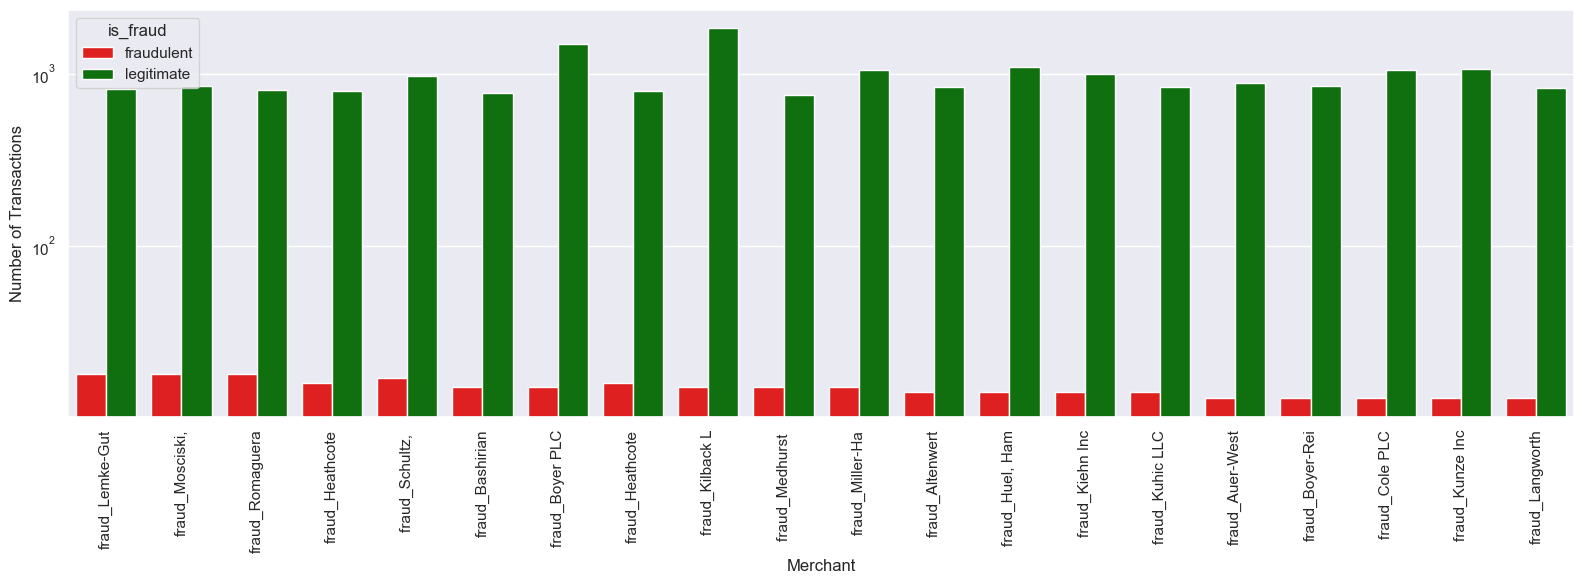

In [47]:
plot_top_20_entities(fraud, 'merchant', 'Top 20 Merchants by Fraudulent Tranactions', 'top_20_merchants_fraud.png', y_scale='log')

In [48]:
# Fraudulent activities by Job
job_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['job']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
job_proportion = job_crosstab.div(job_crosstab.sum(axis=1), axis=0)
job_proportion

job         Science writer  Licensed conveyancer  Systems developer  \
is_fraud                                                              
fraudulent        0.013986              0.013520            0.01352   
legitimate        0.003868              0.002332            0.00584   

job         Engineer, biomedical  Therapist, occupational  \
is_fraud                                                    
fraudulent              0.013054                 0.012587   
legitimate              0.003942                 0.003597   

job         Colour technologist  Counsellor  Comptroller  \
is_fraud                                                   
fraudulent             0.012587    0.012121     0.012121   
legitimate             0.002878    0.004346     0.004984   

job         Research scientist (physical sciences)  Commissioning editor  \
is_fraud                                                                   
fraudulent                                0.011655              0.011189   
legitimate                                0.003810              0.001185   

job         Chemical engineer  Research officer, trade union       Sub  \
is_fraud                                                                 
fraudulent           0.010723                       0.010723  0.010256   
legitimate           0.004019                       0.002795  0.004995   

job         Educational psychologist  Chief Strategy Officer  \
is_fraud                                                       
fraudulent                  0.009790                0.009790   
legitimate                  0.003703                0.003528   

job         Quantity surveyor  Clothing/textile technologist  \
is_fraud                                                       
fraudulent           0.009790                       0.009790   
legitimate           0.004359                       0.004868   

job         Amenity horticulturist  Engineer, automotive    Gaffer  \
is_fraud                                                             
fraudulent                0.009790              0.009324  0.008858   
legitimate                0.002791              0.004328  0.002477   

job         Editor, commissioning  Financial adviser  Pensions consultant  \
is_fraud                                                                    
fraudulent               0.008858           0.008858             0.008392   
legitimate               0.002646           0.005934             0.004541   

job         Energy manager  Barrister  ...  Engineer, materials  \
is_fraud                               ...                        
fraudulent        0.008392   0.007925  ...             0.000000   
legitimate        0.002630   0.004738  ...             0.000385   

job         Financial trader  Firefighter  Hotel manager  Fisheries officer  \
is_fraud                                                                      
fraudulent          0.000000     0.000000       0.000000           0.000000   
legitimate          0.004265     0.004373       0.000401           0.002717   

job         Hospital pharmacist  Hospital doctor  Horticultural therapist  \
is_fraud                                                                    
fraudulent             0.000000         0.000000                  0.00000   
legitimate             0.000779         0.002807                  0.00153   

job         Health service manager  Health physicist  \
is_fraud                                               
fraudulent                0.000000          0.000000   
legitimate                0.001982          0.002421   

job         Health and safety adviser  Glass blower/designer  Geoscientist  \
is_fraud                                                                     
fraudulent                   0.000000               0.000000      0.000000   
legitimate                   0.001947               0.001568      0.004373   

job         Geophysicist/field seismologist  Geologist, wellsite  \
is_fraud              

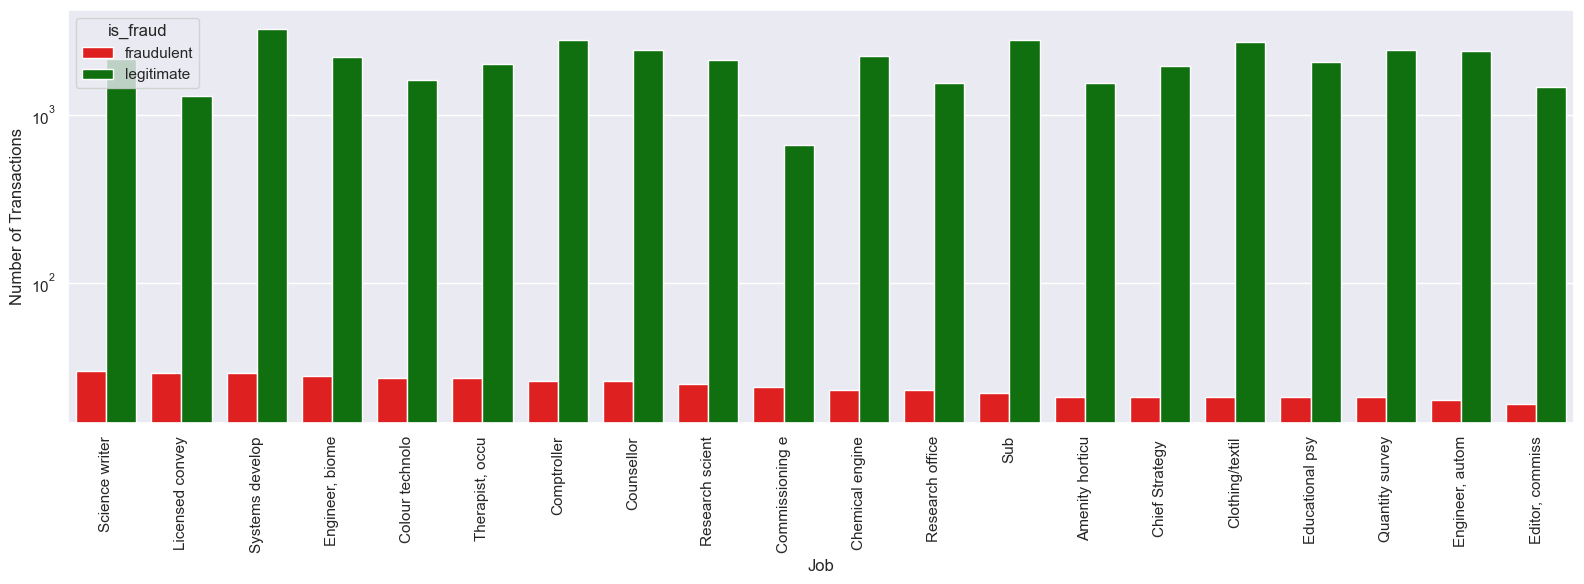

In [49]:
plot_top_20_entities(fraud, 'job', 'Top 20 Jobs with Fraudulnt Transactions', 'top_20_jobs_fraud.png')

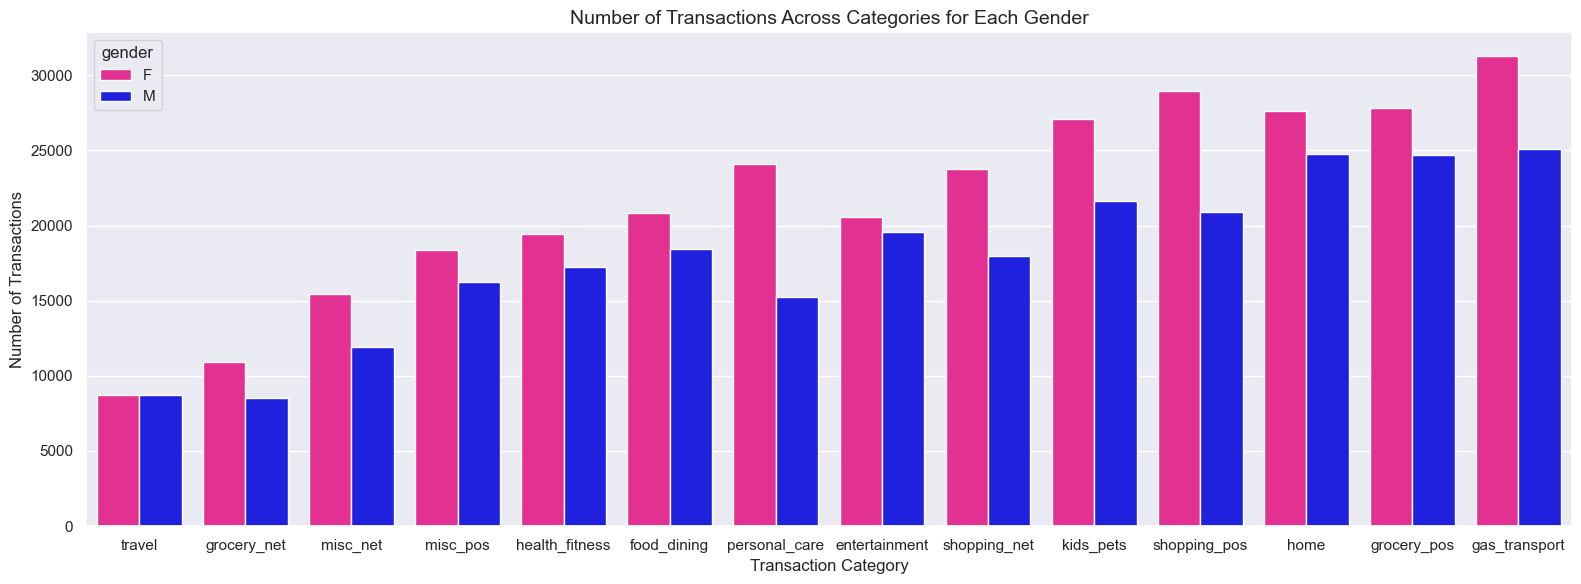

In [50]:
# Calculate the number of transactions for each category and gender
category_counts = fraud.groupby(['category', 'gender']).size().reset_index(name='transaction_count')

# Calculate the total number of transactions for each category
total_category_count = category_counts.groupby('category')['transaction_count'].sum().reset_index()

# Sort categories by the total number of transactions in descending order
sorted_categories = total_category_count.sort_values(by='transaction_count')['category']

# Define the custom color palette
custom_palette = sns.color_palette(["deeppink", "blue"])

# Create a bar plot with sorted categories
sns.barplot(x='category', y='transaction_count', hue='gender', data=category_counts, ci=None, palette=custom_palette, order=sorted_categories)

# Add labels and title
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Across Categories for Each Gender', size=14)

# Adjust layout
plt.xticks(rotation=0)
plt.tight_layout()

In [51]:
def plot_transactions(fraud, feature, title, file_name, y_scale='linear'):
    """
    Generate bar plots for the proportion of transactions across a specific feature, categorized by fraudulent status.

    Parameters:
    fraud (DataFrame): The DataFrame containing transaction data.
    feature (str): The column name of the feature to analyze (e.g., 'month', 'gender', 'category', 'time_of_day').
    title (str): The title of the plot.
    file_name (str): The file name to save the plot as a PNG file.
    y_scale (str): The scale for the y-axis, 'linear' or 'log' (default is 'linear').

    Returns:
    None
    """
    # Group by the specified feature and fraudulent status, and count the number of transactions
    feature_count = fraud.groupby([feature, 'is_fraud']).size().reset_index(name='transaction_count')

    # Calculate the total transactions for each feature value
    total_counts = feature_count.groupby(feature)['transaction_count'].transform('sum')
    feature_count['proportion'] = feature_count['transaction_count'] / total_counts

    # Filter to keep only fraudulent transactions for sorting
    fraudulent_counts = feature_count[feature_count['is_fraud'] == 'fraudulent']

    # Sort feature values by the proportion of fraudulent transactions
    sorted_feature = fraudulent_counts.sort_values(by='proportion', ascending=False)[feature]

    # Define the custom color palette
    custom_palette = sns.color_palette(["red", "green"])

    # Create a bar plot with sorted feature values
    sns.barplot(x=feature, y='proportion', hue='is_fraud', data=feature_count, palette=custom_palette, order=sorted_feature)

    # Add labels and title
    plt.xlabel(feature.capitalize().replace('_', ' '))
    plt.ylabel('Proportion of Transactions')
    plt.yscale(y_scale)
    # plt.title(title, size=14)

    # Adjust layout
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(file_name, dpi=150)

    # Show the plot
    plt.show()

In [52]:
# Fraudulent activities by Category
category_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['category']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
category_proportion = category_crosstab.div(category_crosstab.sum(axis=1), axis=0)
category_proportion

category    shopping_net  grocery_pos  misc_net  shopping_pos  gas_transport  \
is_fraud                                                                       
fraudulent      0.235897     0.226107  0.124476      0.099301       0.071795   
legitimate      0.074557     0.094058  0.048955      0.089560       0.101551   

category    misc_pos  personal_care      home  kids_pets  entertainment  \
is_fraud                                                                  
fraudulent  0.033566       0.032634  0.031235   0.030303       0.027506   
legitimate  0.062326       0.070916  0.094437   0.087842       0.072339   

category    food_dining  health_fitness  grocery_net    travel  
is_fraud                                                        
fraudulent     0.025175        0.024242     0.019114  0.018648  
legitimate     0.070838        0.066156     0.035018  0.031448

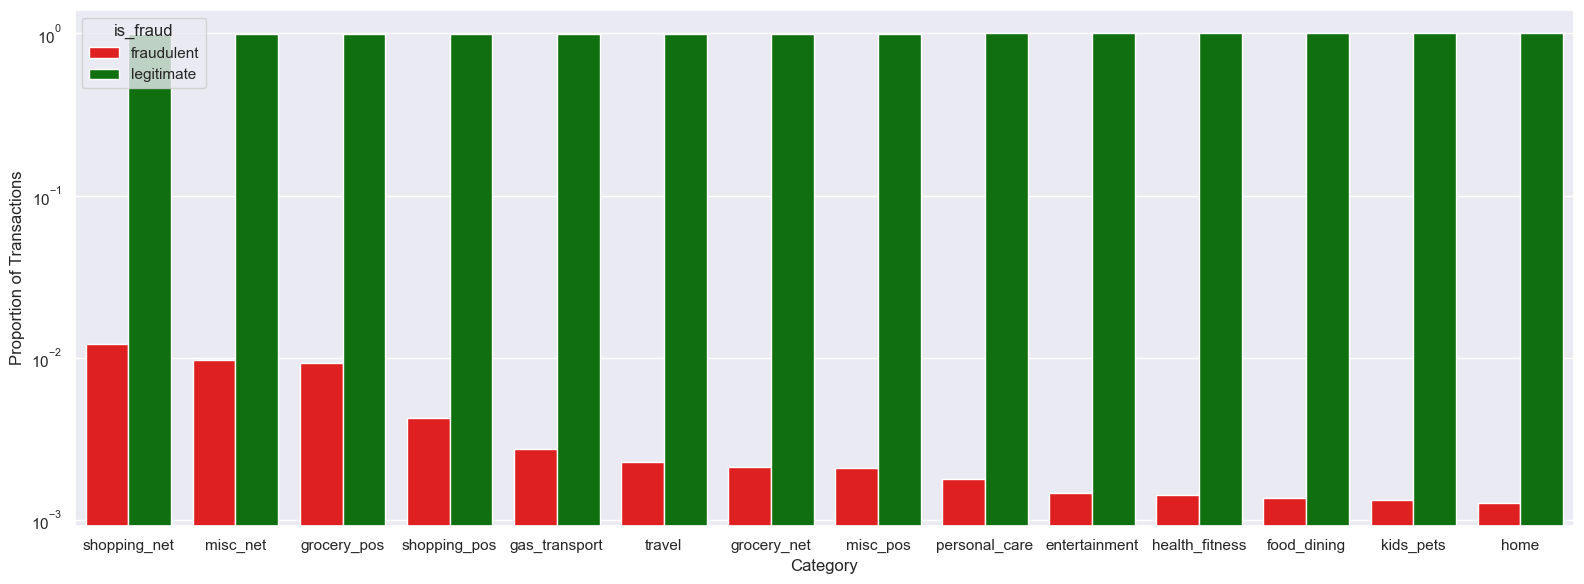

In [53]:
plot_transactions(fraud, 'category', 'Transactions by Categories and Fraudulent Status', 'Transaction__by_Category.png', y_scale='log')

In [54]:
# Fraudulent activities by Age levels
gender_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['gender']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
gender_proportion = gender_crosstab.div(gender_crosstab.sum(axis=1), axis=0)
gender_proportion

gender             F         M
is_fraud                      
fraudulent  0.542657  0.457343
legitimate  0.548657  0.451343

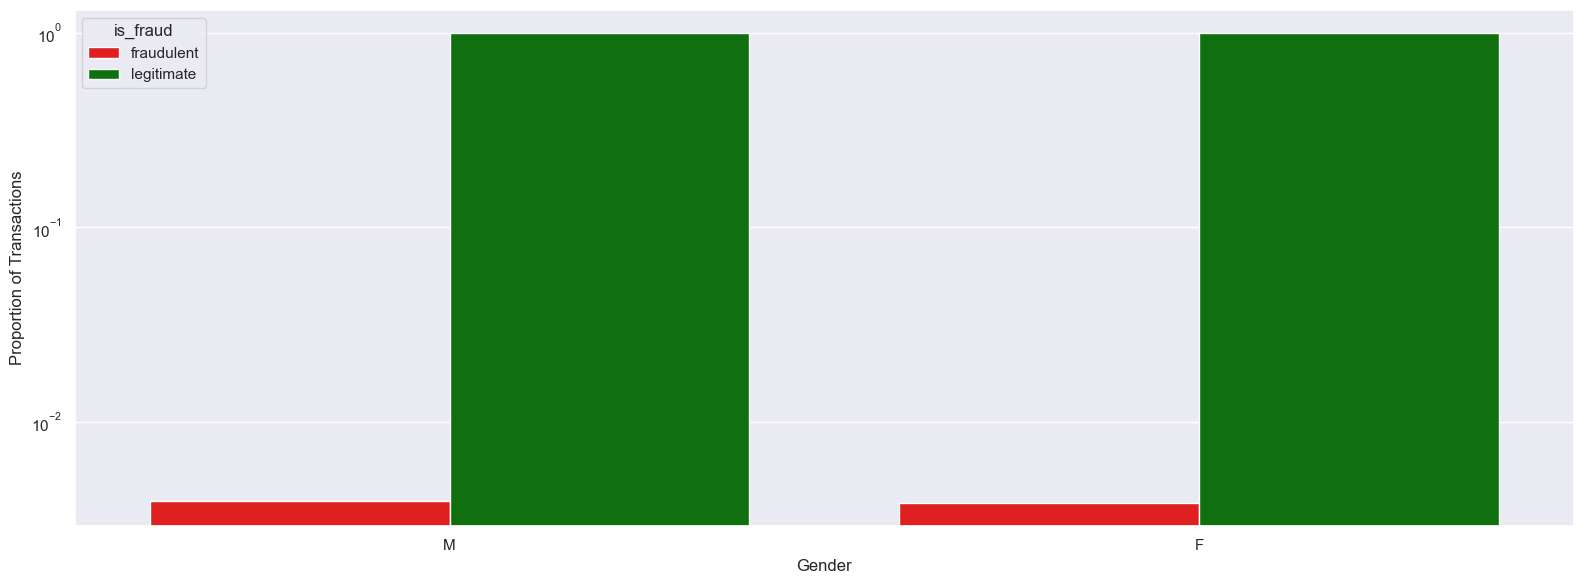

In [55]:
plot_transactions(fraud, 'gender', 'Transactions by Gender and Fraudulent Status', 'Transaction__by_Gender.png', y_scale='log')

In [56]:
# Fraudulent activities by Age levels
age_levels_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['age_levels']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
age_levels_proportion = age_levels_crosstab.div(age_levels_crosstab.sum(axis=1), axis=0)
age_levels_proportion

age_levels    adults  young_adult    elders  teenagers
is_fraud                                              
fraudulent  0.509091     0.365501  0.119814   0.005594
legitimate  0.479332     0.398937  0.104085   0.017645

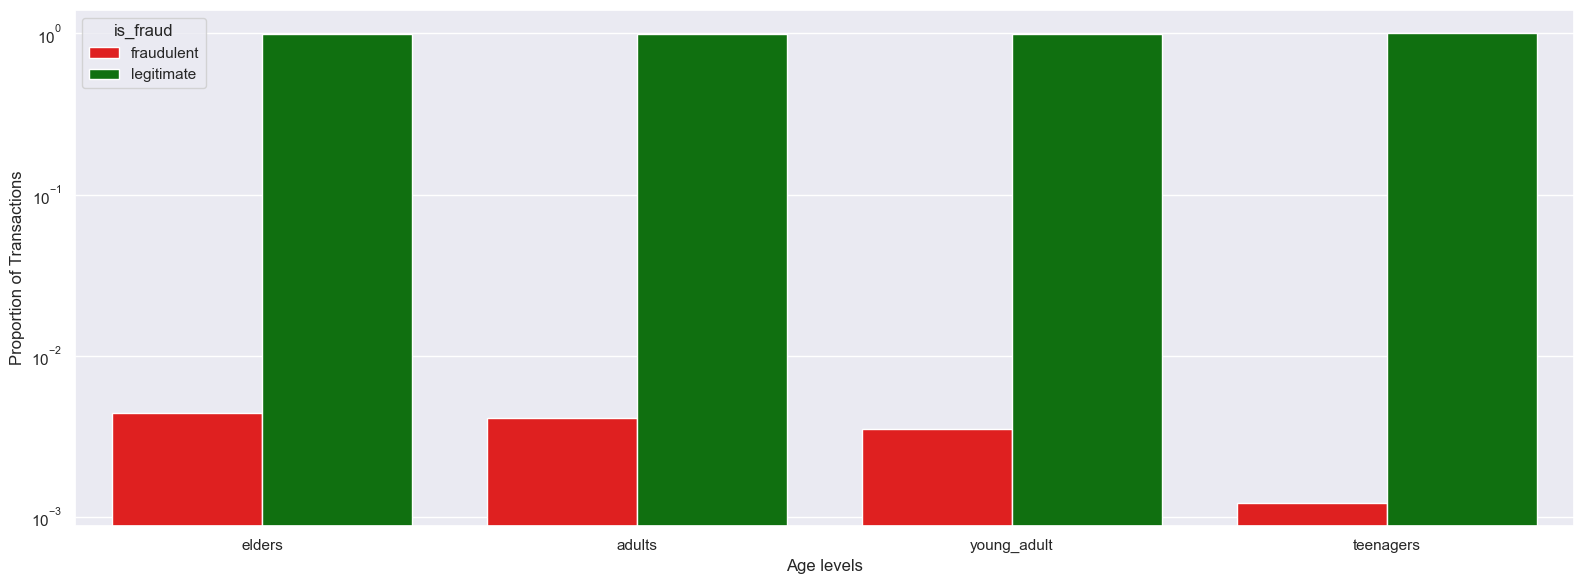

In [57]:
plot_transactions(fraud, 'age_levels', 'Transactions by Age levels and Fraudulent Status', 'Transaction__by_Age_levles.png', y_scale='log')

## Temporal features 
- Hour,
- Time of day,
- Day of week,
- Week of year
- Month

In [58]:
# Fraudulent activities by Job
time_of_day_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['time_of_day']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
time_of_day_proportion = time_of_day_crosstab.div(time_of_day_crosstab.sum(axis=1), axis=0)
time_of_day_proportion

time_of_day     Night       Day
is_fraud                       
fraudulent   0.913287  0.086713
legitimate   0.499095  0.500905

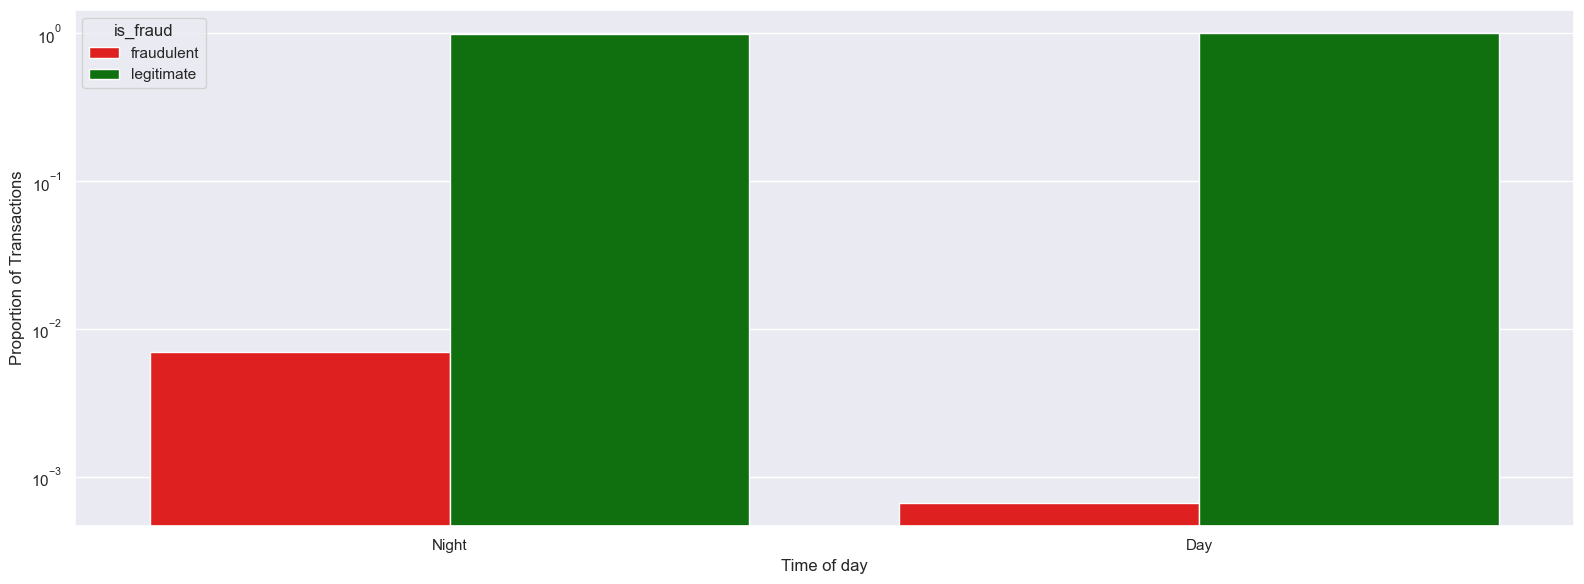

In [59]:
plot_transactions(fraud, 'time_of_day', 'Transactions by Time_of_Day and Fraudulent Status', 'Transaction_by_Time.png', y_scale='log')

In [60]:
# Day of week
week_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

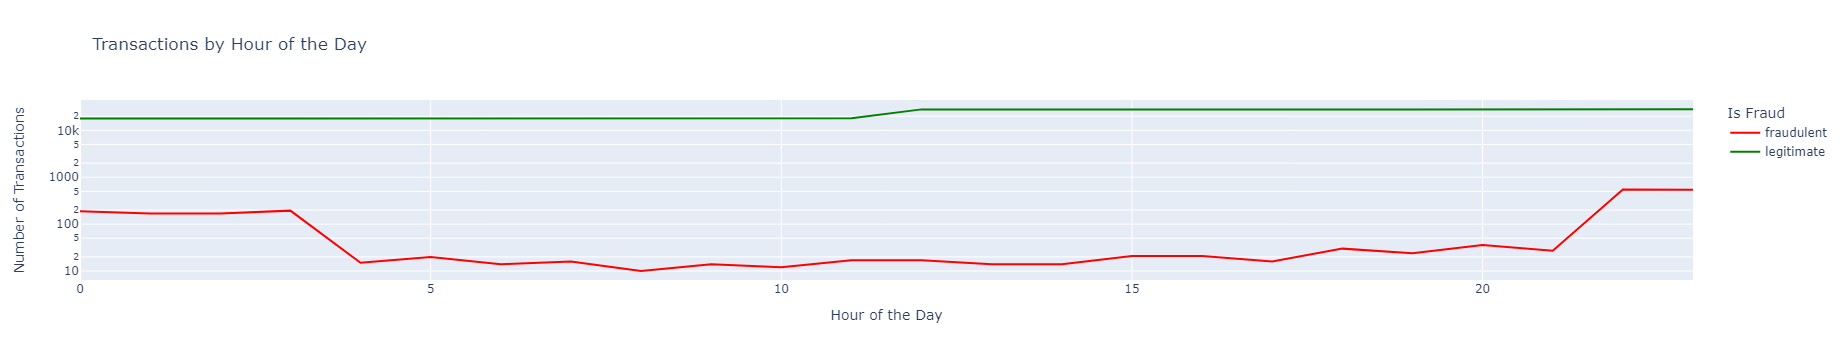

In [61]:
# Group by hour of the day and calculate the sum of transaction amounts
hour_of_day_count = fraud.groupby(['hour_of_day', 'is_fraud']).size().reset_index(name='transaction_count')

# Create a line plot with Plotly
fig = px.line(hour_of_day_count, x='hour_of_day', y='transaction_count', color='is_fraud', 
              labels={'hour_of_day': 'Hour of the Day', 'transaction_count': 'Number of Transactions', 'is_fraud': 'Status'}, title='Transactions by Hour of the Day', color_discrete_map={'legitimate': 'green', 'fraudulent': 'red'})

# Customize the layout
fig.update_layout( xaxis_title='Hour of the Day', yaxis_title='Number of Transactions', legend_title='Is Fraud', yaxis_type="log")

# # Save the plot as a PNG file
fig.write_image("Hour_of_Day.png", engine='kaleido', scale=1, width=1200, height=400)

# Show the plot
fig.show()

In [62]:
# Number of Transaction by Hour of day
hour_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['hour_of_day']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
hour_proportion = hour_crosstab.div(hour_crosstab.sum(axis=1), axis=0)
hour_proportion

hour_of_day        22        23        3         0         1         2   \
is_fraud                                                                  
fraudulent   0.256410  0.250816  0.090443  0.087646  0.078788  0.078322   
legitimate   0.050288  0.051050  0.032525  0.032453  0.033043  0.032465   

hour_of_day        20        18        21        19        15       16  \
is_fraud                                                                 
fraudulent   0.016783  0.013986  0.012587  0.011189  0.009790  0.00979   
legitimate   0.050485  0.050528  0.050902  0.050402  0.050629  0.05156   

hour_of_day        5         12        11        17        7         4   \
is_fraud                                                                  
fraudulent   0.009324  0.007925  0.007925  0.007459  0.007459  0.006993   
legitimate   0.032330  0.050617  0.032644  0.050667  0.032664  0.032624   

hour_of_day        13        9         6         14        10        8   
is_fraud                                                                 
fraudulent   0.006527  0.006527  0.006527  0.006527  0.005594  0.004662  
legitimate   0.050877  0.032574  0.032682  0.050924  0.032583  0.032485

In [63]:
fraud.pivot_table(values='amt', index='hour_of_day', columns='is_fraud', aggfunc='sum').sort_values(by='fraudulent', ascending=False).T

hour_of_day          23          22          3           1           0   \
is_fraud                                                                  
fraudulent    350772.89   341869.08    72764.19    65618.98    65141.92   
legitimate   1743660.06  1730609.48  1365935.18  1389094.57  1334672.95   

hour_of_day          2           20          18          21          19  \
is_fraud                                                                  
fraudulent     63308.06    22437.51    19728.92    17585.00    12458.21   
legitimate   1375281.61  1729327.59  1761529.85  1757290.66  1682741.13   

hour_of_day          15          16          12          13          14  \
is_fraud                                                                  
fraudulent     11113.32    10792.99    10620.14     9962.33     9569.86   
legitimate   1753902.08  1770276.82  1809162.41  1744514.94  1788938.65   

hour_of_day          17          7           11          5           9   \
is_fraud                                                                  
fraudulent      8442.77     6272.43     6259.59     6111.72     5913.35   
legitimate   1766115.39  1372645.40  1372878.88  1352020.12  1369400.21   

hour_of_day          6           10          4           8   
is_fraud                                                     
fraudulent      4824.45     4340.36     4136.26     3280.35  
legitimate   1377036.44  1352011.10  1363052.47  1367480.44

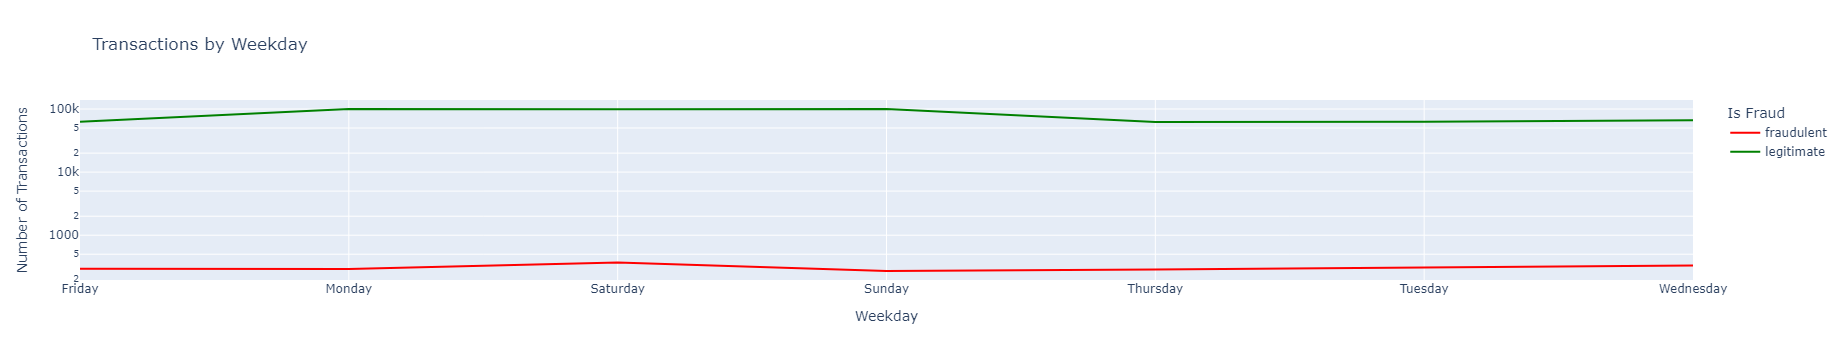

In [64]:
# Group by hour of the day and calculate the sum of transaction amounts
weekay_count = fraud.groupby(['weekday', 'is_fraud']).size().reset_index(name='transaction_count')

# Create a line plot with Plotly
fig = px.line(weekay_count, x='weekday', y='transaction_count', color='is_fraud', 
              labels={'weekday': 'weekday', 'transaction_count': 'Number of Transactions', 'is_fraud': 'Status'}, title='Transactions by Weekday', color_discrete_map={'legitimate': 'green', 'fraudulent': 'red'})

# Customize the layout
fig.update_layout( xaxis_title='Weekday', yaxis_title='Number of Transactions', legend_title='Is Fraud', yaxis_type="log")

# # Save the plot as a PNG file
fig.write_image("WeekDay.png", engine='kaleido', scale=1, width=1200, height=400)

# Show the plot
fig.show()

In [65]:
# Number of Transaction by Weekday
pd.crosstab(index=fraud['is_fraud'], columns=fraud['weekday']).sort_values(by='fraudulent', axis=1, ascending=False)

weekday     Saturday  Wednesday  Tuesday  Friday  Monday  Thursday  Sunday
is_fraud                                                                  
fraudulent       368        331      303     295     292       285     271
legitimate     99155      66431    62924   62678  100016     62289  100081

In [66]:
fraud.pivot_table(values='amt', index='weekday', columns='is_fraud', aggfunc='sum').sort_values(by='fraudulent', ascending=False).T

weekday       Saturday   Wednesday    Tuesday    Thursday      Monday  \
is_fraud                                                                
fraudulent   202537.72   173763.85   162493.6   155961.82   152527.98   
legitimate  6657834.86  4497192.00  4170497.9  4288920.31  6789994.44   

weekday         Friday      Sunday  
is_fraud                            
fraudulent   145372.45   140667.26  
legitimate  4303537.35  6721601.57

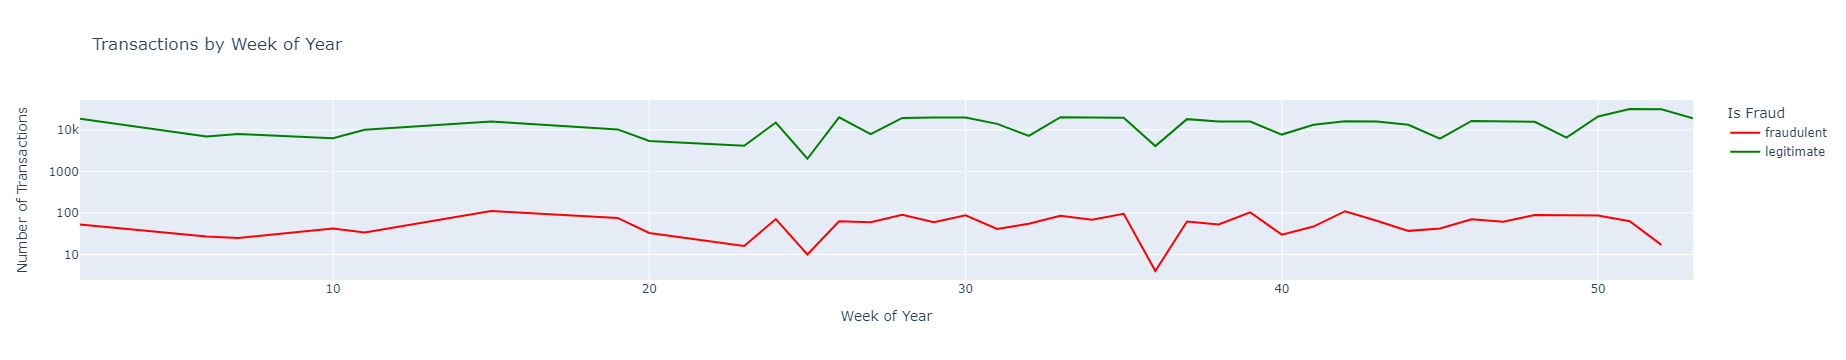

In [67]:
# Group by hour of the day and calculate the sum of transaction amounts
week_of_year_count = fraud.groupby(['week_of_year', 'is_fraud']).size().reset_index(name='transaction_count')

# Create a line plot with Plotly
fig = px.line(week_of_year_count, x='week_of_year', y='transaction_count', color='is_fraud', 
              labels={'week_of_year': 'week_of_year', 'transaction_count': 'Number of Transactions', 'is_fraud': 'Status'}, title='Transactions by Week of Year', color_discrete_map={'legitimate': 'green', 'fraudulent': 'red'})

# Customize the layout
fig.update_layout( xaxis_title='Week of Year', yaxis_title='Number of Transactions', legend_title='Is Fraud', yaxis_type="log")

# # Save the plot as a PNG file
fig.write_image("Week_of_Year.png", engine='kaleido', scale=1, width=1200, height=400)

# Show the plot
fig.show()

In [68]:
# Number of Transaction by Week of Year
pd.crosstab(index=fraud['is_fraud'], columns=fraud['week_of_year']).sort_values(by='fraudulent', axis=1, ascending=False)

week_of_year     15     42     39     35     28     48     30     50     33  \
is_fraud                                                                      
fraudulent      112    110    103     95     90     89     88     87     85   
legitimate    15955  16112  15819  19504  19336  15577  19830  20970  20255   

week_of_year     19     24     46     34     43     26     51     37     47  \
is_fraud                                                                      
fraudulent       76     71     70     69     65     63     63     62     61   
legitimate    10268  15018  16364  19712  15823  19966  31795  18138  15693   

week_of_year     29    27    32     38     2      41    45    10     31  \
is_fraud                                                                  
fraudulent       60    60    55     53     53     47    42    42     41   
legitimate    19732  7941  7148  15955  18549  13219  6125  6308  13957   

week_of_year     44     11    20    40    6     7      52    23    25    36  \
is_fraud                                                                      
fraudulent       37     34    33    30    27    25     17    16    10     4   
legitimate    13240  10045  5392  7705  6957  8005  31487  4128  2018  4077   

week_of_year    49     53  
is_fraud                   
fraudulent       0      0  
legitimate    6530  18921

In [69]:
fraud.pivot_table(values='amt', index='week_of_year', columns='is_fraud', aggfunc='sum').sort_values(by='fraudulent', ascending=False).T

week_of_year          15          39          35          42          48  \
is_fraud                                                                   
fraudulent      53488.54    53160.90    50659.76    50458.91    50273.95   
legitimate    1063610.02  1098940.79  1281801.53  1092514.30  1087689.80   

week_of_year          50          33          30          28          24  \
is_fraud                                                                   
fraudulent      45563.02    43853.05    41302.61    40935.73    39361.96   
legitimate    1410339.00  1354232.19  1316138.24  1342507.18  1037871.96   

week_of_year          43          51          34          26          38  \
is_fraud                                                                   
fraudulent      39280.41    38229.99    37027.54    35662.16    35449.71   
legitimate    1079284.84  2219045.53  1314121.73  1347576.32  1068168.07   

week_of_year          37         19          47          2           29  \
is_fraud                                                                  
fraudulent      35183.89   34820.00    33771.20    31176.49    30754.51   
legitimate    1205750.08  681183.68  1057953.58  1255299.98  1351118.65   

week_of_year          46         27         45         32         31  \
is_fraud                                                               
fraudulent      30752.43   30245.95   28724.86   25750.73   22960.90   
legitimate    1077133.52  532306.11  401908.63  487990.66  946144.25   

week_of_year         41         11         40         10         44  \
is_fraud                                                              
fraudulent     22576.87   20161.91   20075.91   19500.23   18430.45   
legitimate    910377.32  667589.82  522064.09  433174.43  916704.82   

week_of_year         7          20         6           52         25  \
is_fraud                                                               
fraudulent     17634.14   15590.39   14945.56     9326.51    7366.82   
legitimate    518836.71  350572.63  482194.31  2162459.23  126380.99   

week_of_year         23         36         49          53  
is_fraud                                                   
fraudulent      6544.92    2321.77        NaN         NaN  
legitimate    277885.35  272420.82  424456.99  1253830.28

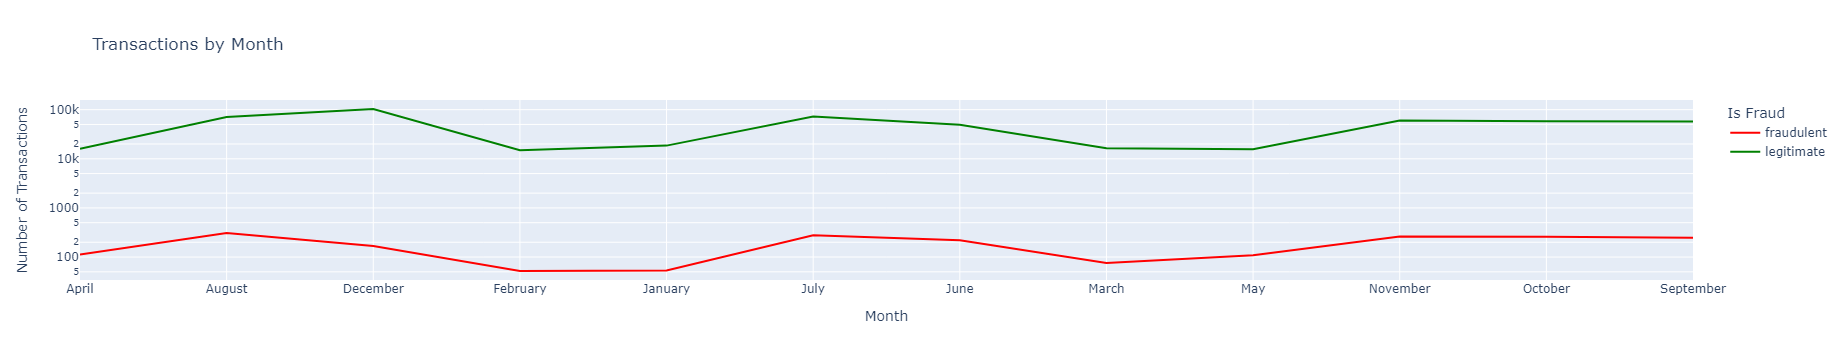

In [70]:
# Group by hour of the day and calculate the sum of transaction amounts
month_count = fraud.groupby(['month', 'is_fraud']).size().reset_index(name='transaction_count')

# Create a line plot with Plotly
fig = px.line(month_count, x='month', y='transaction_count', color='is_fraud', 
              labels={'month': 'Hour', 'transaction_count': 'Number of Transactions', 'is_fraud': 'Status'}, title='Transactions by Month', color_discrete_map={'legitimate': 'green', 'fraudulent': 'red'})

# Customize the layout
fig.update_layout( xaxis_title='Month', yaxis_title='Number of Transactions', legend_title='Is Fraud', yaxis_type="log")

# Save the plot as a PNG file
fig.write_image("Month.png", engine='kaleido', scale=1, width=1200, height=400)
# Show the plot
fig.show()

In [71]:
# Number of Transaction by Weekday
pd.crosstab(index=fraud['is_fraud'], columns=fraud['month']).sort_values(by='fraudulent', axis=1, ascending=False)

month       August   July  November  October  September   June  December  \
is_fraud                                                                   
fraudulent     308    279       262      259        248    220       167   
legitimate   70696  72855     60289    58394      57617  49071    103173   

month       April    May  March  January  February  
is_fraud                                            
fraudulent    112    109     76       53        52  
legitimate  15955  15660  16353    18549     14962

In [72]:
# Number of Transaction by Months
month_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['month']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
month_proportion = month_crosstab.div(month_crosstab.sum(axis=1), axis=0)
month_proportion

month         August      July  November   October  September      June  \
is_fraud                                                                  
fraudulent  0.143590  0.130070  0.122145  0.120746   0.115618  0.102564   
legitimate  0.127708  0.131608  0.108909  0.105485   0.104082  0.088644   

month       December     April       May     March   January  February  
is_fraud                                                                
fraudulent  0.077855  0.052214  0.050816  0.035431  0.024709  0.024242  
legitimate  0.186376  0.028822  0.028289  0.029541  0.033508  0.027028

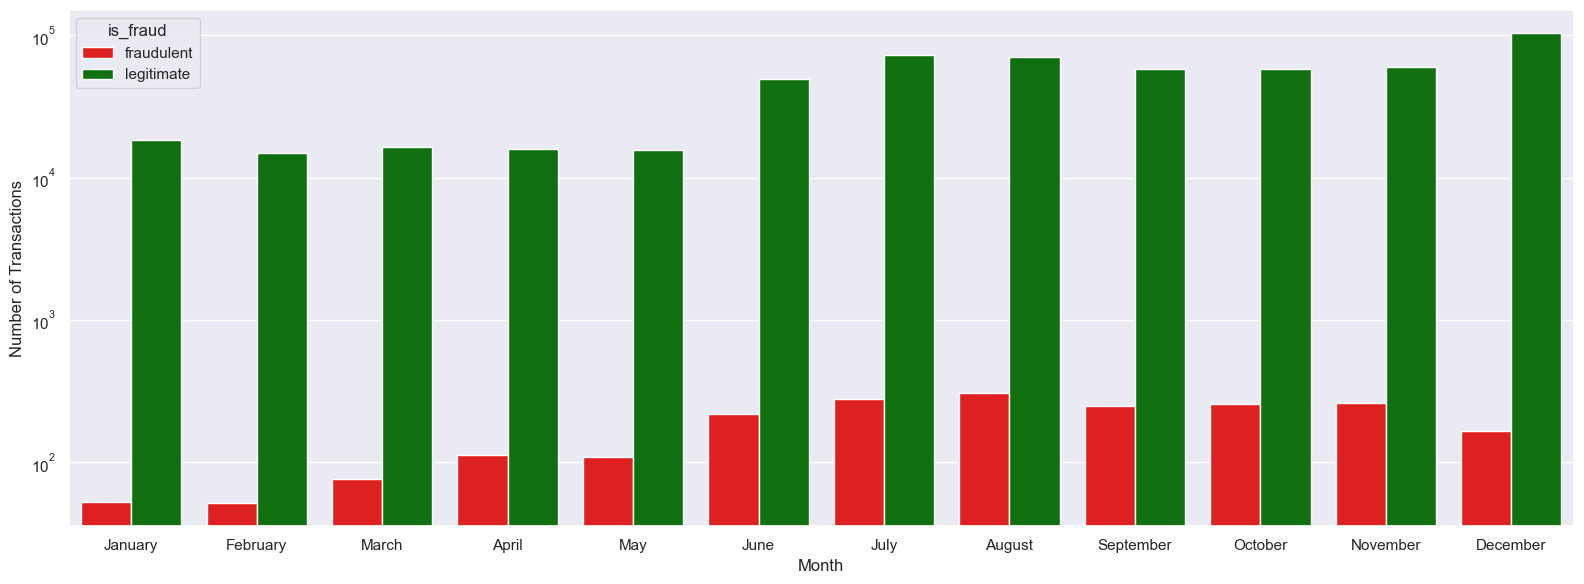

In [73]:
# Group by Month and is_fraud, and count the number of transactions
month_count = fraud.groupby(['month', 'is_fraud']).size().reset_index(name='transaction_count')

custom_palette = sns.color_palette(["red", "green"])
sns.barplot(x='month', y='transaction_count', hue='is_fraud', data=month_count, palette=custom_palette, order=month_order)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.yscale('log')
# plt.title('Transactions by Month and Fraudulent Status', size=14)

# Adjust layout
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Transaction_by_Month.png", dpi=150)

In [74]:
# Create a pivot table for the sum of transaction amounts by month and fraud status
pivot_table = fraud.pivot_table(values='amt', index='month', columns='is_fraud', aggfunc='sum').fillna(0)

# Sort the pivot table by the specified month order
pivot_table.reindex(month_order).T

month          January    February       March       April         May  \
is_fraud                                                                 
fraudulent    31176.49    32579.70    39662.14    53488.54    50410.39   
legitimate  1255299.98  1001031.02  1100764.25  1063610.02  1031756.31   

month             June        July      August   September     October  \
is_fraud                                                                 
fraudulent   119181.81   135953.75   159612.85   143870.41   130746.64   
legitimate  3322020.73  4955908.32  4710566.93  3894923.03  3998881.28   

month         November    December  
is_fraud                            
fraudulent   143522.44    93119.52  
legitimate  4049142.52  7045674.04

In [75]:
# # Group by transaction date and sum the amounts
# daily_transactions = data.groupby('date')['amount'].sum().reset_index(name='total_amount')
# daily_fraud_transactions = data[data['is_fraud'] == 1].groupby('transaction_date')['amount'].sum().reset_index(name='fraud_amount')

# # Merge both dataframes to have a single dataframe for plotting
# daily_data = pd.merge(daily_transactions, daily_fraud_transactions, on='date', how='left')
# daily_data['fraud_amount'].fillna(0, inplace=True)  # Fill NaN values with 0 for days with no fraud

# # Create the plot
# fig = go.Figure()

# fig.add_trace(go.Scatter(
#     x=daily_data['date'], 
#     y=daily_data['total_amount'],
#     mode='lines',
#     name='Total Amount'
# ))

# fig.add_trace(go.Scatter(
#     x=daily_data['date'], 
#     y=daily_data['fraud_amount'],
#     mode='lines',
#     name='Fraud Amount',
#     line=dict(color='red')
# ))

# # Update layout
# fig.update_layout(
#     title='Transaction Amounts Over Time',
#     xaxis_title='Date',
#     yaxis_title='Transaction Amount',
#     legend_title='Transaction Type'
# )

# # Show the plot
# fig.show()


## Spatial features 
- carholder lat & long,
- merchant lat & long,
- distant as crow fly (distance cardholder to merchant),
- card_holder state,
- card_holder city,
- card_holder street

In [76]:
# Number of Transaction by Months
state_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['state']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
state_proportion = state_crosstab.div(state_crosstab.sum(axis=1), axis=0)
state_proportion

state             NY        PA        TX        IL        CA        IN  \
is_fraud                                                                 
fraudulent  0.081585  0.053147  0.052681  0.035431  0.035431  0.034965   
legitimate  0.064568  0.061802  0.072764  0.034113  0.043461  0.021468   

state             VA        MN       MO        IA        KY        WI  \
is_fraud                                                                
fraudulent  0.034965  0.034033  0.03310  0.032168  0.031235  0.030303   
legitimate  0.022456  0.024651  0.02968  0.021226  0.022470  0.022228   

state             AL        MI        GA        OK        MS        FL  \
is_fraud                                                                 
fraudulent  0.029371  0.028438  0.027040  0.026573  0.025175  0.024709   
legitimate  0.031557  0.035424  0.020266  0.020453  0.015859  0.032608   

state             OR        NC        MD        NJ        SC        CT  \
is_fraud                                                                 
fraudulent  0.022378  0.021445  0.021445  0.020047  0.020047  0.018648   
legitimate  0.014023  0.023162  0.020062  0.018941  0.022577  0.005847   

state             OH        NM        MT        KS        NE        AR  \
is_fraud                                                                 
fraudulent  0.018182  0.018182  0.017249  0.017249  0.016783  0.015851   
legitimate  0.036324  0.012611  0.009059  0.017895  0.018464  0.024297   

state             WA        ND        AZ        LA        ID        NH  \
is_fraud                                                                 
fraudulent  0.013986  0.012587  0.012587  0.010256  0.010256  0.009324   
legitimate  0.014607  0.011507  0.008246  0.016197  0.004458  0.006194   

state             TN        SD        MA        ME        AK        DC  \
is_fraud                                                                 
fraudulent  0.008858  0.008392  0.008392  0.006993  0.006527  0.004662   
legitimate  0.013259  0.009451  0.009336  0.012488  0.001498  0.002722   

state             HI        WY        CO        RI        NV        UT  \
is_fraud                                                                 
fraudulent  0.004196  0.004196  0.000932  0.000000  0.000000  0.000000   
legitimate  0.001953  0.015255  0.010629  0.000352  0.004428  0.008414   

state             VT        WV  
is_fraud                        
fraudulent  0.000000  0.000000  
legitimate  0.009112  0.019578

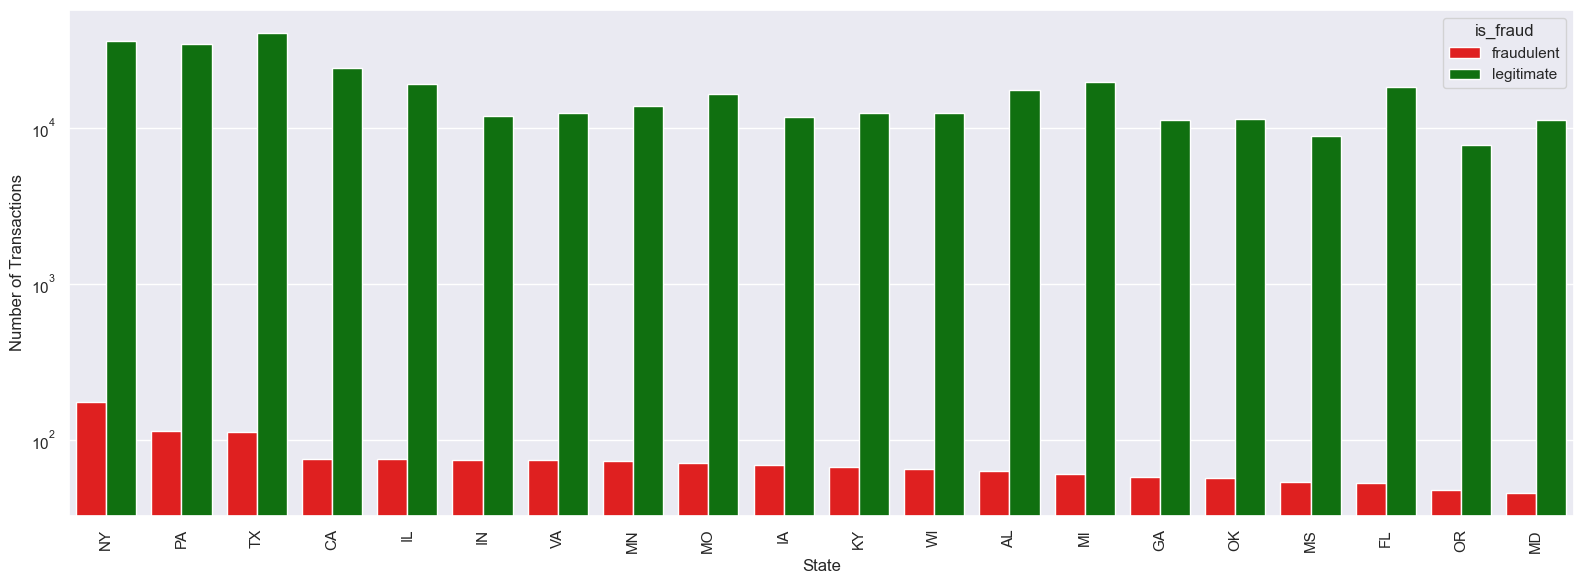

In [77]:
plot_top_20_entities(fraud, 'state', 'Top 20 States with Fraudulent Transactions', 'top_20_states_fraud.png', y_scale='log')

In [78]:
# Number of Transaction by Months
cities_crosstab = pd.crosstab(index=fraud['is_fraud'], columns=fraud['city']).sort_values(by='fraudulent', axis=1, ascending=False)
# Calculate the proportion
cities_proportion = cities_crosstab.div(cities_crosstab.sum(axis=1), axis=0)
cities_proportion

city          Camden  Birmingham   Burrton  Clarks Mills   Chatham       Jay  \
is_fraud                                                                       
fraudulent  0.012587    0.011655  0.008858      0.008392  0.007459  0.007459   
legitimate  0.002016    0.004332  0.000874      0.002630  0.000408  0.000408   

city        Reynolds   Bradley   Leonard  Mound City  Prosperity  \
is_fraud                                                           
fraudulent  0.007459  0.007459  0.006993    0.006993    0.006993   
legitimate  0.000824  0.002253  0.001949    0.001577    0.000811   

city        Heislerville  Plymouth  Cottekill  Sutherland  Whittemore  \
is_fraud                                                                
fraudulent      0.006993  0.006993   0.006993    0.006993    0.006993   
legitimate      0.000732  0.001602   0.002301    0.002352    0.000406   

city         Bristol   Phoenix     Lomax  Carlotta     Viola    Turner  \
is_fraud                                                                 
fraudulent  0.006993  0.006993  0.006993  0.006993  0.006527  0.006527   
legitimate  0.001216  0.003987  0.002477  0.001573  0.001145  0.001180   

city           Craig  Smiths Grove   Oolitic  ...    Mallie  Manchester  \
is_fraud                                      ...                         
fraudulent  0.006527      0.006527  0.006527  ...  0.000000    0.000000   
legitimate  0.000000      0.001931  0.001983  ...  0.001642    0.001171   

city        Manderson  Manistique    Manley  Cleveland  Clifton  Lonetree  \
is_fraud                                                                    
fraudulent   0.000000    0.000000  0.000000   0.000000  0.00000  0.000000   
legitimate   0.001611    0.002439  0.001176   0.003555  0.00077  0.000755   

city           Clune       Leo  Collegeville   Lepanto   Coleman  \
is_fraud                                                           
fraudulent  0.000000  0.000000      0.000000  0.000000  0.000000   
legitimate  0.000806  0.001601      0.000419  0.000412  0.001147   

city        Liberty Mills      Lima  Coleharbor  Lithopolis   Acworth  \
is_fraud                                                                
fraudulent       0.000000  0.000000    0.000000    0.000000  0.000000   
legitimate       0.000408  0.001169    0.001579    0.000464  0.001496   

city        Cokeburg  Coffeeville     Loami     Logan  Cochranton    Lolita  \
is_fraud                                                                      
fraudulent  0.000000     0.000000  0.000000  0.000000    0.000000  0.000000   
legitimate  0.001532     0.001507  0.000435  0.001573    0.001989  0.001228   

city         Achille  
is_fraud              
fraudulent  0.000000  
legitimate  0.000376  

[2 rows x 849 columns]

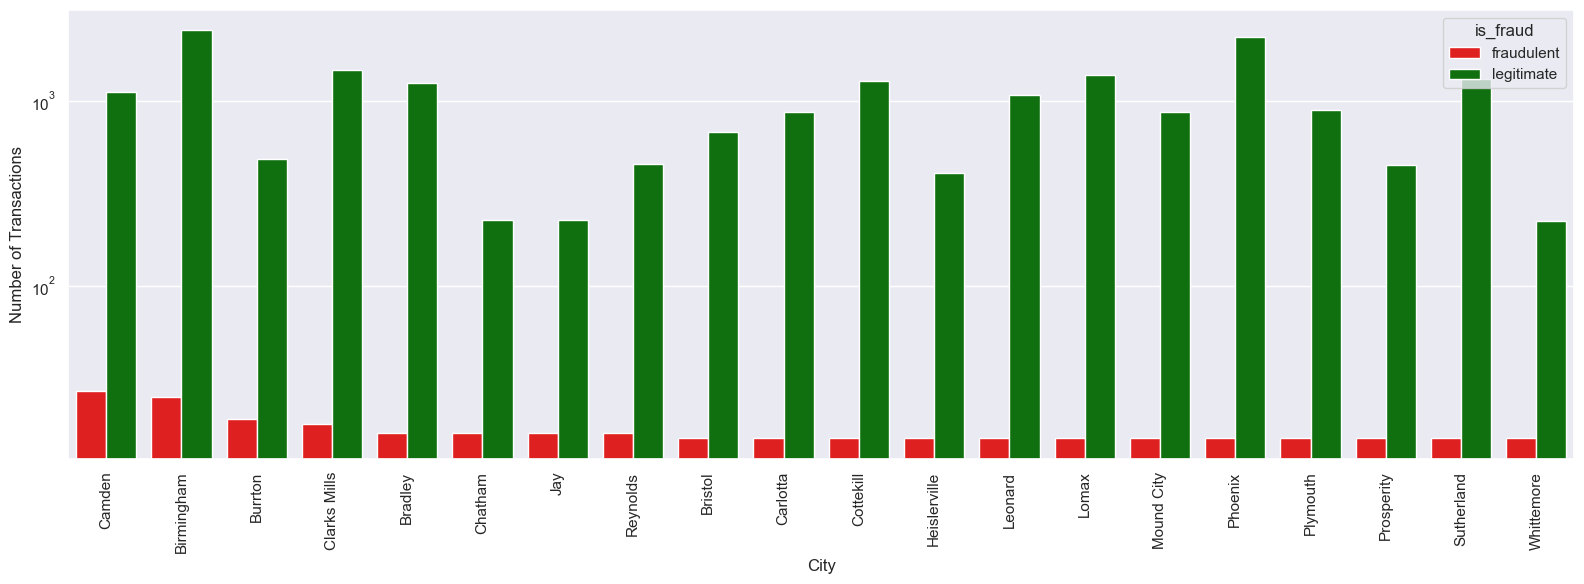

In [79]:
plot_top_20_entities(fraud, 'city', 'Top 20 Cities with Fraudulent Transactions', 'top_20_cities_fraud.png',)

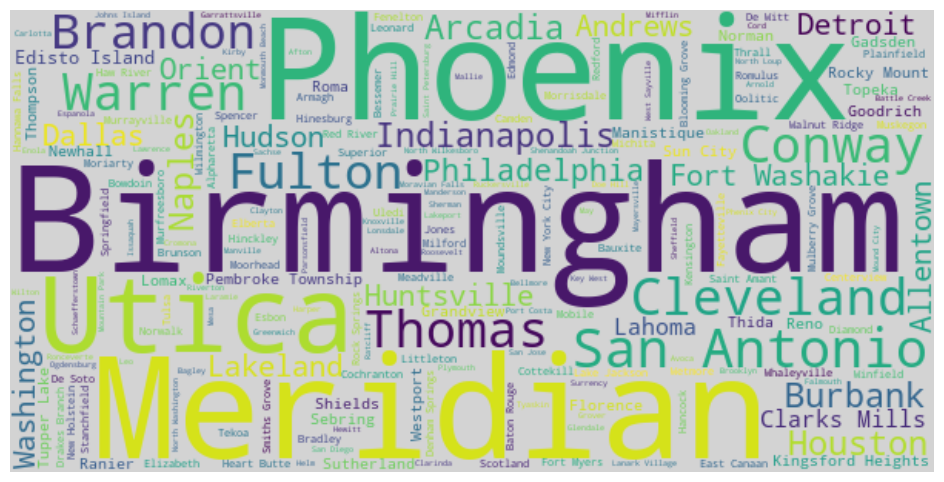

In [80]:
# Create a word cloud from the product_brand column
wordcloud = WordCloud(width=600, height=300,  background_color='lightgray').generate_from_frequencies(fraud['city'].value_counts())

# Create a plot to display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

plt.savefig("City_Chart.png", dpi=150)

In [81]:
# Fraudulent activities by State (in order of state with highest fraudulent activities
pd.crosstab(index=fraud['is_fraud'], columns=fraud['state']).sort_values(by='fraudulent', axis=1, ascending=False)

state          NY     PA     TX     IL     CA     IN     VA     MN     MO  \
is_fraud                                                                    
fraudulent    175    114    113     76     76     75     75     73     71   
legitimate  35743  34212  40280  18884  24059  11884  12431  13646  16430   

state          IA     KY     WI     AL     MI     GA     OK    MS     FL  \
is_fraud                                                                   
fraudulent     69     67     65     63     61     58     57    54     53   
legitimate  11750  12439  12305  17469  19610  11219  11322  8779  18051   

state         OR     NC     MD     NJ     SC    CT     OH    NM    MT    KS  \
is_fraud                                                                      
fraudulent    48     46     46     43     43    40     39    39    37    37   
legitimate  7763  12822  11106  10485  12498  3237  20108  6981  5015  9906   

state          NE     AR    WA    ND    AZ    LA    ID    NH    TN    SD  \
is_fraud                                                                   
fraudulent     36     34    30    27    27    22    22    20    19    18   
legitimate  10221  13450  8086  6370  4565  8966  2468  3429  7340  5232   

state         MA    ME   AK    DC    HI    WY    CO   RI    NV    UT    VT  \
is_fraud                                                                     
fraudulent    18    15   14    10     9     9     2    0     0     0     0   
legitimate  5168  6913  829  1507  1081  8445  5884  195  2451  4658  5044   

state          WV  
is_fraud           
fraudulent      0  
legitimate  10838

In [82]:
fraud['is_fraud'].value_counts()

legitimate    553574
fraudulent      2145
Name: is_fraud, dtype: int64

In [83]:
import folium
from folium.plugins import HeatMap
from IPython.display import display, HTML
from ipyleaflet import Map, Heatmap, Marker, LayerGroup
import ipywidgets as widgets

In [84]:
# # Create a base map
# base_map = folium.Map(location=[fraud['lat'].mean(), fraud['long'].mean()], zoom_start=6)

# # Filter fraud data
# fraud_data = fraud[fraud['is_fraud'] == 'fraudulent'] 
# # Group by location and count transactions
# location_counts = fraud_data.groupby(['lat', 'long']).size().reset_index(name='count')

# # Prepare heatmap data with intensity
# heat_data = [[row['lat'], row['long'], row['count']] for index, row in location_counts.iterrows()]

# # Add a heatmap layer with intensity
# HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(base_map)

# # Add markers with tooltips for each location
# for index, row in location_counts.iterrows():
#     folium.CircleMarker( location=[row['lat'], row['long']], radius=5, color='red', fill=False,
#          tooltip=f"Fraudulent Transactions: {row['count']}"
#     ).add_to(base_map)

# # Add a border around the map
# base_map.add_child(folium.TileLayer('Stamen Terrain', overlay=True, name='Border'))

# # Save map to an HTML file
# base_map.save('fraud_heatmap_with_tooltips.html')

# base_map.save('fraud_heatmap_with_tooltips.png')

# # Display the map in Jupyter
# display(HTML('<iframe src="fraud_heatmap_with_tooltips.html" width="100%" height="500"></iframe>'))

In [85]:
# Create a base map
base_map = folium.Map(location=[fraud['lat'].mean(), fraud['long'].mean()], zoom_start=4)

# Filter fraud data
fraud_data = fraud[fraud['is_fraud'] == 'fraudulent']

# Group by location and count transactions
location_counts = fraud_data.groupby(['lat', 'long']).size().reset_index(name='count')

# Prepare heatmap data with intensity
heat_data = [[row['lat'], row['long'], row['count']] for index, row in location_counts.iterrows()]

# Add a heatmap layer with intensity
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(base_map)

# Add markers with tooltips for each location
for index, row in location_counts.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color='red',
        fill=False,
        tooltip=f"Fraudulent Transactions: {row['count']}"
    ).add_to(base_map)

# Add a border around the map
base_map.add_child(folium.TileLayer('Stamen Terrain', overlay=True, name='Border', opacity=0.8, color='#FF0000'))

# Save map to an HTML file
base_map.save('fraud_heatmap_with_tooltips.html')

# Display the map in Jupyter
display(HTML('<iframe src="fraud_heatmap_with_tooltips.html" width="100%" height="500"></iframe>'))

In [86]:
from selenium import webdriver

# Load the HTML file in the browser
driver = webdriver.Chrome()
driver.get(r"C:\Users\Inspiron 5515\Downloads\Prof Albert\Fraud detection\fraud_heatmap_with_tooltips.html")

# Take a screenshot and save it as an interactive image
driver.get_screenshot_as_file('interactive_image2.png')

# Close the browser
driver.quit()

In [87]:
# Create a base map using folium
center = [fraud['lat'].mean(), fraud['long'].mean()]
base_map = folium.Map(location=center, zoom_start=6)

# Add fraud transactions to the map
fraud_data = fraud[fraud['is_fraud'] == 'fraudulent']
heat_data = [[row['lat'], row['long']] for index, row in fraud_data.iterrows()]
HeatMap(heat_data).add_to(base_map)

# Save map to an HTML file
base_map.save('fraud_heatmap.html')

# Display the heatmap interactively in Jupyter Lab using ipyleaflet
m = Map(center=center, zoom=6)

# Create heatmap layer
heatmap = Heatmap(locations=[], radius=15)
m.add_layer(heatmap)

# Function to update heatmap and add markers for fraudulent transactions for a specific month
def update_heatmap(month):
    fraud_data = fraud[(fraud['is_fraud'] == 'fraudulent') & (fraud['month'] == month)]
    heat_data = [[row['lat'], row['long']] for index, row in fraud_data.iterrows()]
    heatmap.locations = heat_data
    
    # Remove existing markers
    while len(m.layers) > 1:
        m.remove_layer(m.layers[-1])
    
    # Add markers for fraudulent transactions
    # Add markers with tooltips for each location
    for index, row in location_counts.iterrows():
        folium.CircleMarker( location=[row['lat'], row['long']], radius=5, color='red', fill=False,
         tooltip=f"Fraudulent Transactions: {row['count']}"
        ).add_to(base_map)

# Create a dropdown widget for month selection
month_dropdown = widgets.Dropdown(
    options=fraud['month'].unique().tolist(),
    value=fraud['month'].unique()[0],
    description='Month:',
)

# Add an observer to update heatmap and markers when the dropdown value changes
month_dropdown.observe(lambda change: update_heatmap(change['new']), names='value')

# Display the map and widget
display(month_dropdown)
display(m)

# Initialize the heatmap with the default month's data
update_heatmap(month_dropdown.value)

Dropdown(description='Month:', options=('January', 'February', 'March', 'April', 'May', 'June', 'July', 'Augus…

Map(center=[38.5432528213, -90.23132507832193], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zo…

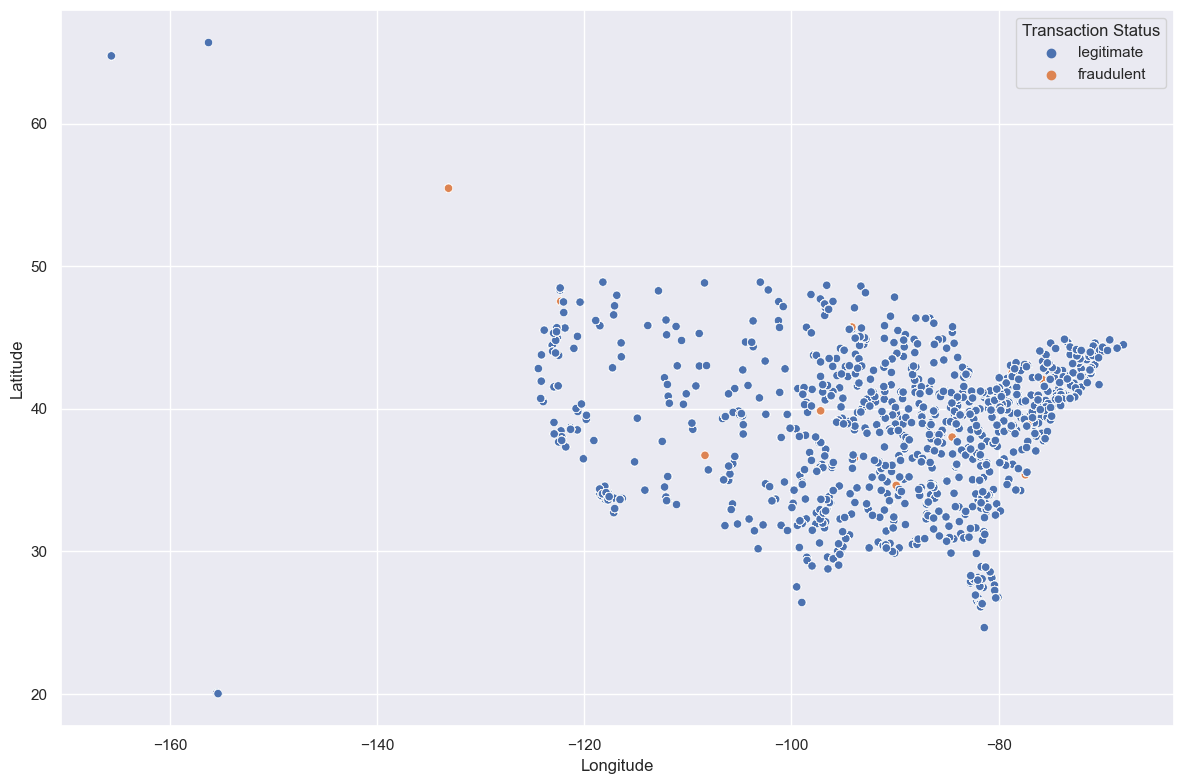

In [88]:
# latitude, and longitude (Map plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=fraud)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
# plt.title('Transaction Status Across the US', fontsize=14)
plt.legend(title='Transaction Status')
plt.tight_layout()

In [89]:
fraud.head()

trans_date_trans_time        cc_num                           merchant  \
0   2020-01-07 18:05:00  6.041621e+10               fraud_Jast-McDermott   
1   2020-01-07 18:14:00  6.041621e+10               fraud_Sporer-Keebler   
2   2020-01-07 21:23:00  6.041621e+10            fraud_Gaylord-Powlowski   
3   2020-01-07 21:28:00  6.041621e+10             fraud_Volkman-Predovic   
4   2020-01-08 03:51:00  6.041621e+10  fraud_Schultz, Simonis and Little   

        category    amt gender            street           city state  \
0   shopping_pos   9.33      F  9886 Anita Drive  Fort Washakie    WY   
1  personal_care   1.79      F  9886 Anita Drive  Fort Washakie    WY   
2           home  14.65      F  9886 Anita Drive  Fort Washakie    WY   
3   shopping_net   8.82      F  9886 Anita Drive  Fort Washakie    WY   
4    grocery_pos  92.26      F  9886 Anita Drive  Fort Washakie    WY   

       lat      long  city_pop                          job  merch_lat  \
0  43.0048 -108.8964      1645  Information systems manager  43.534230   
1  43.0048 -108.8964      1645  Information systems manager  43.013767   
2  43.0048 -108.8964      1645  Information systems manager  42.025461   
3  43.0048 -108.8964      1645  Information systems manager  43.074086   
4  43.0048 -108.8964      1645  Information systems manager  42.104826   

   merch_long    is_fraud  hour_of_day       date  month_no  weekday_no  \
0 -108.039394  legitimate           18 2020-01-07         1           1   
1 -108.926964  legitimate           18 2020-01-07         1           1   
2 -108.876771  legitimate           21 2020-01-07         1           1   
3 -109.356660  legitimate           21 2020-01-07         1           1   
4 -109.108232  legitimate            3 2020-01-08         1           2   

   week_of_year    month  weekday time_of_day     time_diff  age   age_levels  \
0             2  January   Monday       Night  49764.572515   33  young_adult   
1             2  January   Monday       Night    540.000000   33  young_adult   
2             2  January   Monday       Night  11340.000000   33  young_adult   
3             2  January   Monday       Night    300.000000   33  young_adult   
4             2  January  Tuesday       Night  22980.000000   33  young_adult   

   full_name  previous_fraud  num_of_transactions  transactions_per_day  \
0  Mary Diaz               0                    1              0.005155   
1  Mary Diaz               0                    2              0.010309   
2  Mary Diaz               0                    3              0.015464   
3  Mary Diaz               0                    4              0.020619   
4  Mary Diaz               0                    5              0.025773   

   distance_as_crow_fly  
0             91.105025  
1              2.683586  
2            108.800164  
3             38.287667  
4            101.475095

#### Temporal feature - timestamp
#### Spatial data - lat, long, merch_lat,	merch_long, distance_as_crow_fly

### Spatio-Temporal Clustering Using DBSCAN

In [90]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.base import BaseEstimator, ClusterMixin

In [91]:
# Convert timestamp to numerical format
fraud['timestamp'] = fraud['trans_date_trans_time'].apply(lambda x: x.timestamp())

# Normalize the timestamp (optional, but recommended for distance-based algorithms)
fraud['normalized_timestamp'] = (fraud['timestamp'] - fraud['timestamp'].mean()) / fraud['timestamp'].std()

# Prepare data for clustering
clustering_data = fraud[['lat', 'long', 'merch_lat', 'merch_long', 'distance_as_crow_fly', 'normalized_timestamp']]

In [92]:
# # Custom wrapper for DBSCAN to use with RandomizedSearchCV
# class DBSCANWrapper(BaseEstimator, ClusterMixin):
#     def __init__(self, eps=0.5, min_samples=5):
#         self.eps = eps
#         self.min_samples = min_samples

#     def fit(self, X, y=None):
#         self.model = DBSCAN(eps=self.eps, min_samples=self.min_samples)
#         self.model.fit(X)
#         self.labels_ = self.model.labels_
#         return self

#     def fit_predict(self, X, y=None):
#         self.fit(X)
#         return self.labels_

# # Define a custom scorer using silhouette score
# def silhouette_scorer(estimator, X):
#     labels = estimator.fit_predict(X)
#     if len(set(labels)) > 1:
#         return silhouette_score(X, labels)
#     else:
#         return -1  # In case all points are assigned to one cluster or labeled as noise

# # Parameters for RandomizedSearchCV
# param_dist = {
#     'eps': np.arange(0.1, 2.0, 0.1),
#     'min_samples': np.arange(2, 20, 1)
# }

# # Initialize DBSCANWrapper
# dbscan = DBSCANWrapper()

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(dbscan, param_distributions=param_dist, n_iter=50, scoring=make_scorer(silhouette_scorer), n_jobs=-1, cv=3, random_state=42)

# # Fit RandomizedSearchCV
# random_search.fit(clustering_data)

# # Best parameters
# print("Best parameters found: ", random_search.best_params_)
# print("Best silhouette score: ", random_search.best_score_)

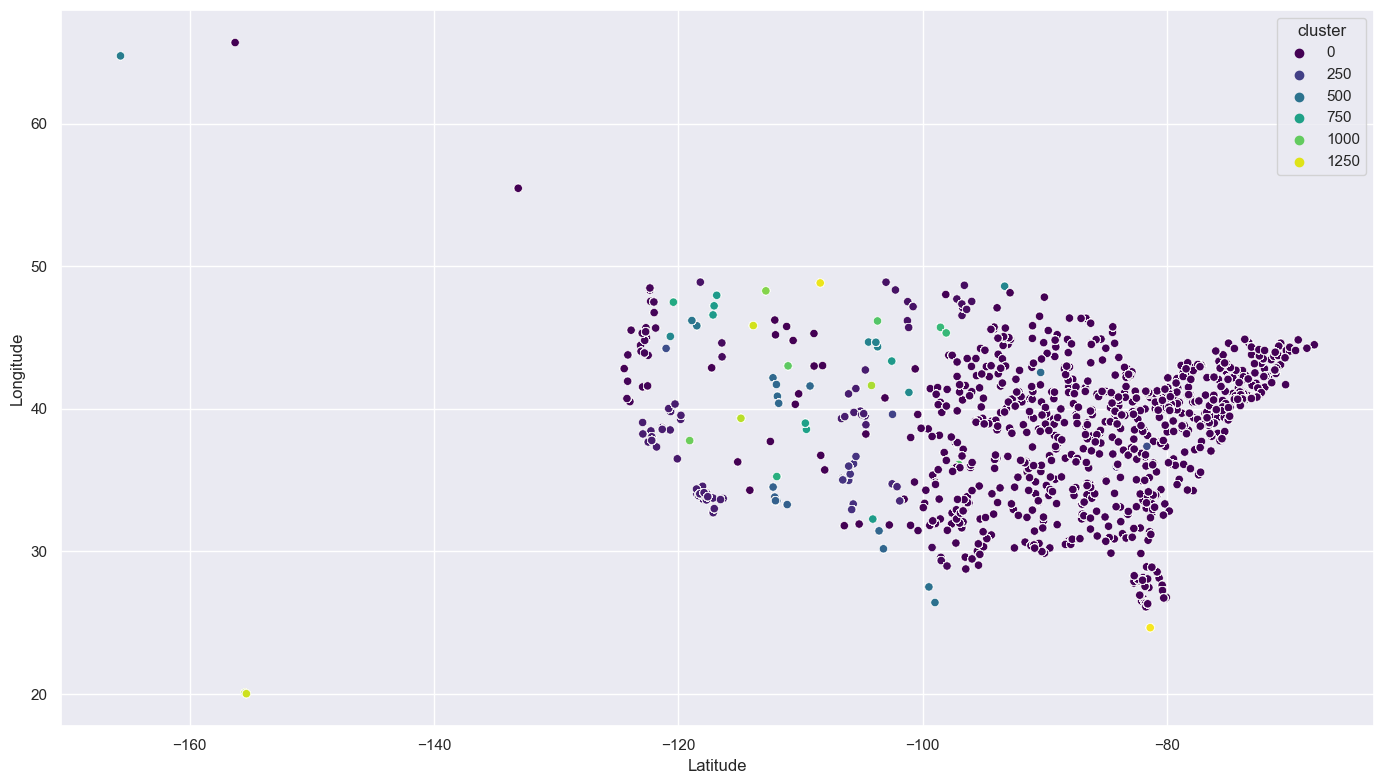

In [93]:
# Initialize DBSCANWrapper
dbscan = DBSCAN()

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=1.4, min_samples=5)
fraud['cluster'] = dbscan.fit_predict(clustering_data)

# Plot clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(x='long', y='lat', hue='cluster', data=fraud, palette='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
# plt.title('Spatio-Temporal Clustering of Transactions')
plt.tight_layout()
plt.savefig("Spatio_Temporal_Clustering.png", dpi=150)

In [94]:
fraud.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'lat', 'long', 'city_pop', 'job',
       'merch_lat', 'merch_long', 'is_fraud', 'hour_of_day', 'date',
       'month_no', 'weekday_no', 'week_of_year', 'month', 'weekday',
       'time_of_day', 'time_diff', 'age', 'age_levels', 'full_name',
       'previous_fraud', 'num_of_transactions', 'transactions_per_day',
       'distance_as_crow_fly', 'timestamp', 'normalized_timestamp', 'cluster'],
      dtype='object')

In [95]:
# Drop col
fraud.drop(columns=['trans_date_trans_time', 'lat', 'long', 'merch_lat', 'merch_long', 'date', 'month', 'weekday', 'timestamp', 'normalized_timestamp',], axis=1, inplace=True)

### Feature Engineering/Selection

In [96]:
# Define the dictionary mapping
fraud_mapping = {'fraudulent': 1, 'legitimate': 0}

# Map the 'is_fraud' column using the defined dictionary
fraud['is_fraud'] = fraud['is_fraud'].map(fraud_mapping)

In [97]:
fraud.head()

cc_num                           merchant       category    amt  \
0  6.041621e+10               fraud_Jast-McDermott   shopping_pos   9.33   
1  6.041621e+10               fraud_Sporer-Keebler  personal_care   1.79   
2  6.041621e+10            fraud_Gaylord-Powlowski           home  14.65   
3  6.041621e+10             fraud_Volkman-Predovic   shopping_net   8.82   
4  6.041621e+10  fraud_Schultz, Simonis and Little    grocery_pos  92.26   

  gender            street           city state  city_pop  \
0      F  9886 Anita Drive  Fort Washakie    WY      1645   
1      F  9886 Anita Drive  Fort Washakie    WY      1645   
2      F  9886 Anita Drive  Fort Washakie    WY      1645   
3      F  9886 Anita Drive  Fort Washakie    WY      1645   
4      F  9886 Anita Drive  Fort Washakie    WY      1645   

                           job  is_fraud  hour_of_day  month_no  weekday_no  \
0  Information systems manager         0           18         1           1   
1  Information systems manager         0           18         1           1   
2  Information systems manager         0           21         1           1   
3  Information systems manager         0           21         1           1   
4  Information systems manager         0            3         1           2   

   week_of_year time_of_day     time_diff  age   age_levels  full_name  \
0             2       Night  49764.572515   33  young_adult  Mary Diaz   
1             2       Night    540.000000   33  young_adult  Mary Diaz   
2             2       Night  11340.000000   33  young_adult  Mary Diaz   
3             2       Night    300.000000   33  young_adult  Mary Diaz   
4             2       Night  22980.000000   33  young_adult  Mary Diaz   

   previous_fraud  num_of_transactions  transactions_per_day  \
0               0                    1              0.005155   
1               0                    2              0.010309   
2               0                    3              0.015464   
3               0                    4              0.020619   
4               0                    5              0.025773   

   distance_as_crow_fly  cluster  
0             91.105025        0  
1              2.683586       -1  
2            108.800164        0  
3             38.287667        0  
4            101.475095        0

In [98]:
num_col = ['amt', 'city_pop', 'time_diff', 'age', 'num_of_transactions', 'distance_as_crow_fly', 'cc_num', 'hour_of_day', 'week_of_year']

#### Standardizing Numerical Varaibles

In [99]:
from sklearn.preprocessing import MinMaxScaler

def minmax_scale_and_merge(df, numerical_cols):
    scaled_df = fraud.copy()

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Scale numerical columns
    scaled_values = scaler.fit_transform(df[numerical_cols])

    # Create a DataFrame from the scaled values
    scaled_df[numerical_cols] = scaled_values

    return scaled_df

In [100]:
fraud = minmax_scale_and_merge(fraud, num_col)

#### Encoding Categorical variable

In [101]:
# List of categorical variables for frequency encoding
freq_encode_vars = ['gender', 'time_of_day', 'merchant', 'city', 'state', 'street', 'job', 'full_name', 'category']

# Perform frequency encoding for each categorical variable
for var in freq_encode_vars:
    freq_encode = fraud[var].value_counts() / len(fraud)
    fraud[var + '_encoded'] = fraud[var].map(freq_encode)

# Drop the original categorical variables
fraud.drop(freq_encode_vars, axis=1, inplace=True)

# The final_data is now the fraud DataFrame with frequency-encoded categorical variables
final_data = fraud

In [102]:
final_data.head()

cc_num       amt  city_pop  is_fraud  hour_of_day  month_no  weekday_no  \
0     0.0  0.000366  0.000558         0     0.782609         1           1   
1     0.0  0.000035  0.000558         0     0.782609         1           1   
2     0.0  0.000600  0.000558         0     0.913043         1           1   
3     0.0  0.000343  0.000558         0     0.913043         1           1   
4     0.0  0.004008  0.000558         0     0.130435         1           2   

   week_of_year  time_diff       age   age_levels  previous_fraud  \
0           0.0   0.001961  0.231707  young_adult               0   
1           0.0   0.000021  0.231707  young_adult               0   
2           0.0   0.000447  0.231707  young_adult               0   
3           0.0   0.000012  0.231707  young_adult               0   
4           0.0   0.000905  0.231707  young_adult               0   

   num_of_transactions  transactions_per_day  distance_as_crow_fly  cluster  \
0             0.000000              0.005155              0.604325        0   
1             0.000509              0.010309              0.017000       -1   
2             0.001018              0.015464              0.721862        0   
3             0.001527              0.020619              0.253495        0   
4             0.002037              0.025773              0.673206        0   

   gender_encoded  time_of_day_encoded  merchant_encoded  city_encoded  \
0        0.548633             0.500694          0.001706      0.002859   
1        0.548633             0.500694          0.001413      0.002859   
2        0.548633             0.500694          0.001940      0.002859   
3        0.548633             0.500694          0.001479      0.002859   
4        0.548633             0.500694          0.001780      0.002859   

   state_encoded  street_encoded  job_encoded  full_name_encoded  \
0       0.015213         0.00122     0.001641            0.00122   
1       0.015213         0.00122     0.001641            0.00122   
2       0.015213         0.00122     0.001641            0.00122   
3       0.015213         0.00122     0.001641            0.00122   
4       0.015213         0.00122     0.001641            0.00122   

   category_encoded  
0          0.089597  
1          0.070768  
2          0.094193  
3          0.075180  
4          0.094568

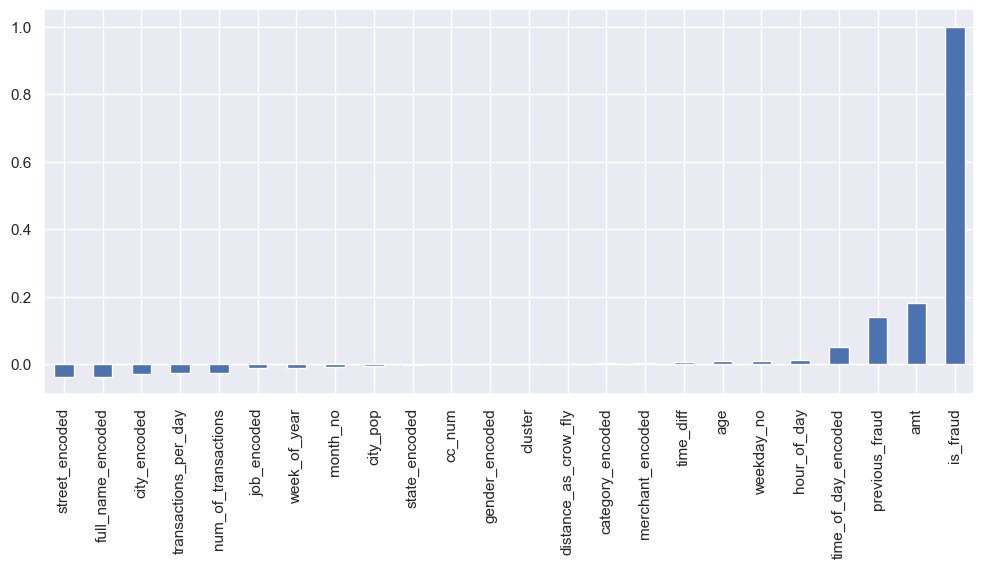

In [103]:
# Features correlation with target
final_data.corr()['is_fraud'].sort_values().plot(kind='bar',figsize=(12,5));

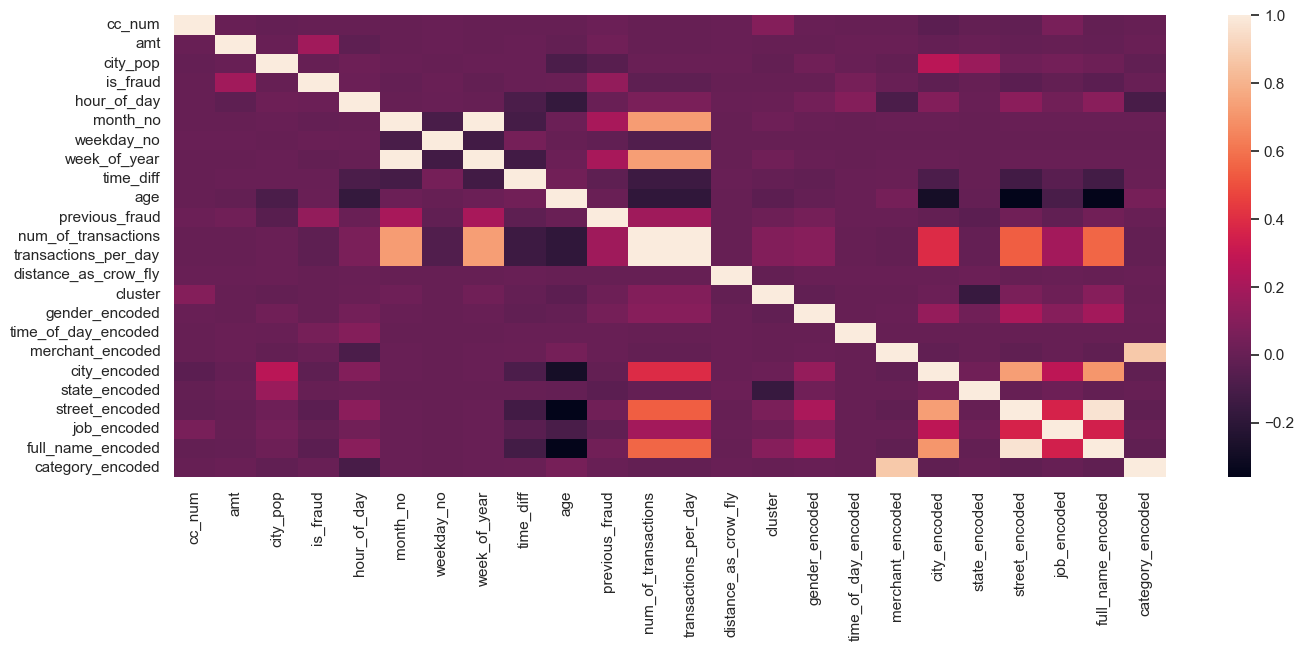

In [104]:
# Checking for multicolinearity amongst columns
corr = final_data.corr()
sns.heatmap(corr, fmt = '.2f');
plt.savefig("Correlation.png", dpi=150)

In [105]:
# Calculate the correlation between features and target variable
final_data.corr()

cc_num       amt  city_pop  is_fraud  hour_of_day  \
cc_num                1.000000  0.001963 -0.009414 -0.001540    -0.001137   
amt                   0.001963  1.000000  0.002760  0.182267    -0.029860   
city_pop             -0.009414  0.002760  1.000000 -0.004910     0.018937   
is_fraud             -0.001540  0.182267 -0.004910  1.000000     0.011686   
hour_of_day          -0.001137 -0.029860  0.018937  0.011686     1.000000   
month_no             -0.002943  0.000128  0.000412 -0.010188    -0.004167   
weekday_no            0.000625  0.002769 -0.002228  0.007823     0.003928   
week_of_year         -0.002946 -0.000038  0.000602 -0.010832    -0.004106   
time_diff            -0.000106  0.002843  0.000867  0.005269    -0.094947   
age                   0.000180 -0.012833 -0.091070  0.007329    -0.173763   
previous_fraud        0.011082  0.026963 -0.052135  0.138868     0.007037   
num_of_transactions  -0.002708 -0.004354  0.008731 -0.028281     0.063807   
transactions_per_day -0.002708 -0.004354  0.008731 -0.028281     0.063807   
distance_as_crow_fly  0.001499  0.000764  0.010992  0.000239     0.000510   
cluster               0.092507 -0.000063 -0.015297  0.000039     0.009502   
gender_encoded        0.001482 -0.000027  0.029367 -0.000748     0.038515   
time_of_day_encoded  -0.000588  0.007323  0.000607  0.051366     0.095438   
merchant_encoded     -0.001658  0.008945 -0.013022  0.003277    -0.092949   
city_encoded         -0.039348 -0.005848  0.264460 -0.028534     0.086939   
state_encoded        -0.012818  0.002364  0.164620 -0.004513     0.002103   
street_encoded       -0.017512 -0.007715  0.022898 -0.038545     0.114440   
job_encoded           0.057610 -0.004447  0.042602 -0.011015     0.036504   
full_name_encoded    -0.015029 -0.007849  0.020872 -0.037617     0.111958   
category_encoded     -0.001178  0.009105 -0.016002  0.001732    -0.103533   

                      month_no  weekday_no  week_of_year  time_diff       age  \
cc_num               -0.002943    0.000625     -0.002946  -0.000106  0.000180   
amt                   0.000128    0.002769     -0.000038   0.002843 -0.012833   
city_pop              0.000412   -0.002228      0.000602   0.000867 -0.091070   
is_fraud             -0.010188    0.007823     -0.010832   0.005269  0.007329   
hour_of_day          -0.004167    0.003928     -0.004106  -0.094947 -0.173763   
month_no              1.000000   -0.096253      0.996849  -0.115526  0.011753   
weekday_no           -0.096253    1.000000     -0.123865   0.043644  0.000227   
week_of_year          0.996849   -0.123865      1.000000  -0.124151  0.011657   
time_diff            -0.115526    0.043644     -0.124151   1.000000  0.033080   
age                   0.011753    0.000227      0.011657   0.033080  1.000000   
previous_fraud        0.204575   -0.016291      0.204875  -0.027969  0.005863   
num_of_transactions   0.728659   -0.069478      0.730515  -0.139712 -0.189444   
transactions_per_day  0.728659   -0.069478      0.730515  -0.139712 -0.189444   
distance_as_crow_fly  0.000214   -0.001391      0.000199   0.001234 -0.003061   
cluster               0.026947   -0.003879      0.027123  -0.010118 -0.036615   
gender_encoded        0.001114   -0.000356      0.001023  -0.020723 -0.005753   
time_of_day_encoded  -0.001283   -0.001680     -0.001423   0.004957  0.002832   
merchant_encoded      0.002171   -0.000020      0.001948   0.008931  0.045570   
city_encoded          0.001262   -0.002378      0.001433  -0.088326 -0.281489   
state_encoded         0.000114   -0.000234      0.000213  -0.004884 -0.008532   
street_encoded        0.001104   -0.001487      0.001179  -0.123143 -0.361201   
job_encoded           0.002334   -0.002873      0.002313  -0.044496 -0.099270   
full_name_encoded     0.001069   -0.001797      0.001184  -0.119299 -0.352138   
category_encoded      0.001562   -0.000251      0.001356   0.010399  0.052815   

                      previous_fraud  num_of_transactions  \
cc_num     

In [106]:
final_data.corr()['is_fraud'].sort_values(ascending=False)

is_fraud                1.000000
amt                     0.182267
previous_fraud          0.138868
time_of_day_encoded     0.051366
hour_of_day             0.011686
weekday_no              0.007823
age                     0.007329
time_diff               0.005269
merchant_encoded        0.003277
category_encoded        0.001732
distance_as_crow_fly    0.000239
cluster                 0.000039
gender_encoded         -0.000748
cc_num                 -0.001540
state_encoded          -0.004513
city_pop               -0.004910
month_no               -0.010188
week_of_year           -0.010832
job_encoded            -0.011015
num_of_transactions    -0.028281
transactions_per_day   -0.028281
city_encoded           -0.028534
full_name_encoded      -0.037617
street_encoded         -0.038545
Name: is_fraud, dtype: float64

### Preprocessing

In [107]:
final_data.nunique()

cc_num                     904
amt                      37256
city_pop                   835
is_fraud                     2
hour_of_day                 24
month_no                    12
weekday_no                   7
week_of_year                39
time_diff                11474
age                         83
age_levels                   4
previous_fraud               2
num_of_transactions       1965
transactions_per_day      1965
distance_as_crow_fly    555719
cluster                   1316
gender_encoded               2
time_of_day_encoded          2
merchant_encoded           418
city_encoded               408
state_encoded               49
street_encoded             393
job_encoded                383
full_name_encoded          396
category_encoded            14
dtype: int64

In [108]:
# Drop due to high multicolinarity (0.9)with other variable features 
final_data.drop(columns=["transactions_per_day", "month_no", 'full_name_encoded', 'age_levels'], axis=1, inplace=True)

In [109]:
final_data.head()

cc_num       amt  city_pop  is_fraud  hour_of_day  weekday_no  \
0     0.0  0.000366  0.000558         0     0.782609           1   
1     0.0  0.000035  0.000558         0     0.782609           1   
2     0.0  0.000600  0.000558         0     0.913043           1   
3     0.0  0.000343  0.000558         0     0.913043           1   
4     0.0  0.004008  0.000558         0     0.130435           2   

   week_of_year  time_diff       age  previous_fraud  num_of_transactions  \
0           0.0   0.001961  0.231707               0             0.000000   
1           0.0   0.000021  0.231707               0             0.000509   
2           0.0   0.000447  0.231707               0             0.001018   
3           0.0   0.000012  0.231707               0             0.001527   
4           0.0   0.000905  0.231707               0             0.002037   

   distance_as_crow_fly  cluster  gender_encoded  time_of_day_encoded  \
0              0.604325        0        0.548633             0.500694   
1              0.017000       -1        0.548633             0.500694   
2              0.721862        0        0.548633             0.500694   
3              0.253495        0        0.548633             0.500694   
4              0.673206        0        0.548633             0.500694   

   merchant_encoded  city_encoded  state_encoded  street_encoded  job_encoded  \
0          0.001706      0.002859       0.015213         0.00122     0.001641   
1          0.001413      0.002859       0.015213         0.00122     0.001641   
2          0.001940      0.002859       0.015213         0.00122     0.001641   
3          0.001479      0.002859       0.015213         0.00122     0.001641   
4          0.001780      0.002859       0.015213         0.00122     0.001641   

   category_encoded  
0          0.089597  
1          0.070768  
2          0.094193  
3          0.075180  
4          0.094568

#### Splitting

In [110]:
X = final_data.drop("is_fraud", axis=1)
y = final_data["is_fraud"]

#### Build Model

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import compute_class_weight
from sklearn.model_selection import cross_val_predict, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, f1_score, recall_score

In [113]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([  0.50197563, 127.04212933])

#### RandomForestClassifier model

In [115]:
# Define Model
rf_model = RandomForestClassifier(class_weight=dict(enumerate(class_weights)), max_features= None,  n_estimators = 100, random_state=101)

# Perform cross-validation on the training set
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=3)

# Print cross-validation scores
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean Cross-Validation Score:", rf_cv_scores.mean())

# Fit RandomForestClassifier model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_y_pred = rf_model.predict(X_test)

# Calculate train and test accuracy
rf_train_acc = rf_model.score(X_train, y_train)
rf_test_acc = accuracy_score(y_test, rf_y_pred)

print(f"Random Forest Train Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_acc:.4f}")

Random Forest Cross-Validation Scores: [0.9985887  0.9986504  0.99858098]
Mean Cross-Validation Score: 0.9986066944838113
Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.9987


In [116]:
params = rf_model.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 0.501975626625924, 1: 127.0421293272371}, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


In [117]:
# Make predictions on the test set
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Initialize the list to store F1 scores and recall cores for different thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []
recall_scores = []

# Calculate F1 score and recall for each threshold
for threshold in thresholds:
    y_pred = (y_pred_prob > threshold).astype(int)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1_scores.append(f1)
    recall_scores.append(recall)

# Find the threshold with the highest F1 score
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
best_f1_score = f1_scores[best_threshold_idx]
best_recall = recall_scores[best_threshold_idx]

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1_score}")
print(f"Recall at best F1 score: {best_recall}")

# You can set a minimum recall requirement, for example 0.9
required_recall = 0.84
filtered_thresholds = [t for i, t in enumerate(thresholds) if recall_scores[i] >= required_recall]

if filtered_thresholds:
    optimal_threshold = filtered_thresholds[np.argmax([f1_scores[i] for i, t in enumerate(thresholds) if t in filtered_thresholds])]
    print(f"Optimal threshold with recall >= {required_recall}: {optimal_threshold}")
else:
    print(f"No threshold found with recall >= {required_recall}")

# Use the optimal threshold for prediction
rf_y_pred = (y_pred_prob > optimal_threshold).astype(int)

Best threshold: 0.3
Best F1 score: 0.8291845493562233
Recall at best F1 score: 0.7866449511400652
Optimal threshold with recall >= 0.84: 0.18


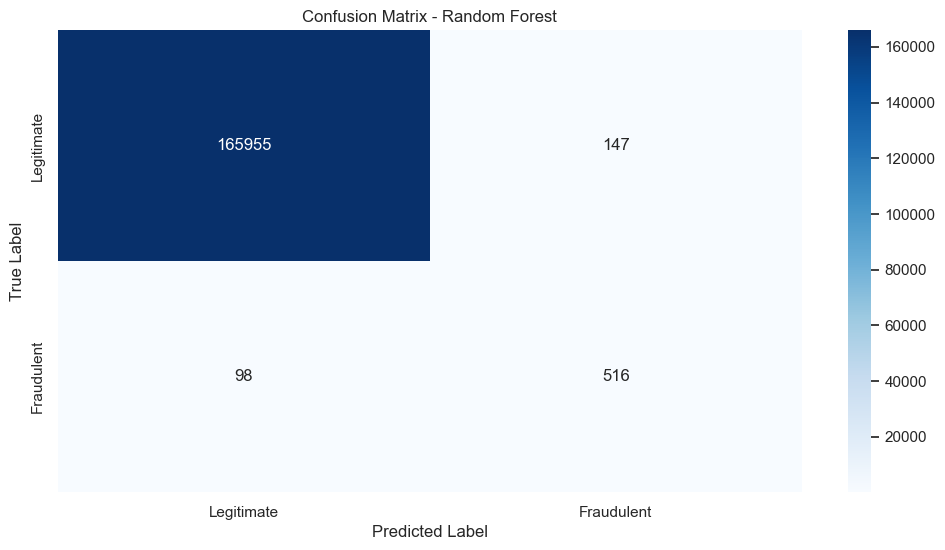

In [118]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Define custom labels for the confusion matrix
custom_labels = ['Legitimate', 'Fraudulent']

# Plot confusion matrix with custom labels
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest');
plt.savefig("Confusion Matrix - Random Forest.png", dpi=150)

In [119]:
# Print classification report
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_y_pred))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166102
           1       0.78      0.84      0.81       614

    accuracy                           1.00    166716
   macro avg       0.89      0.92      0.90    166716
weighted avg       1.00      1.00      1.00    166716



Features with importance >= median importance (0.0070):
                Feature  Importance
17       street_encoded    0.007270
5          week_of_year    0.009015
14     merchant_encoded    0.016644
6             time_diff    0.018246
13  time_of_day_encoded    0.019620
9   num_of_transactions    0.027342
19     category_encoded    0.032605
3           hour_of_day    0.035737
1                   amt    0.212039
8        previous_fraud    0.589582


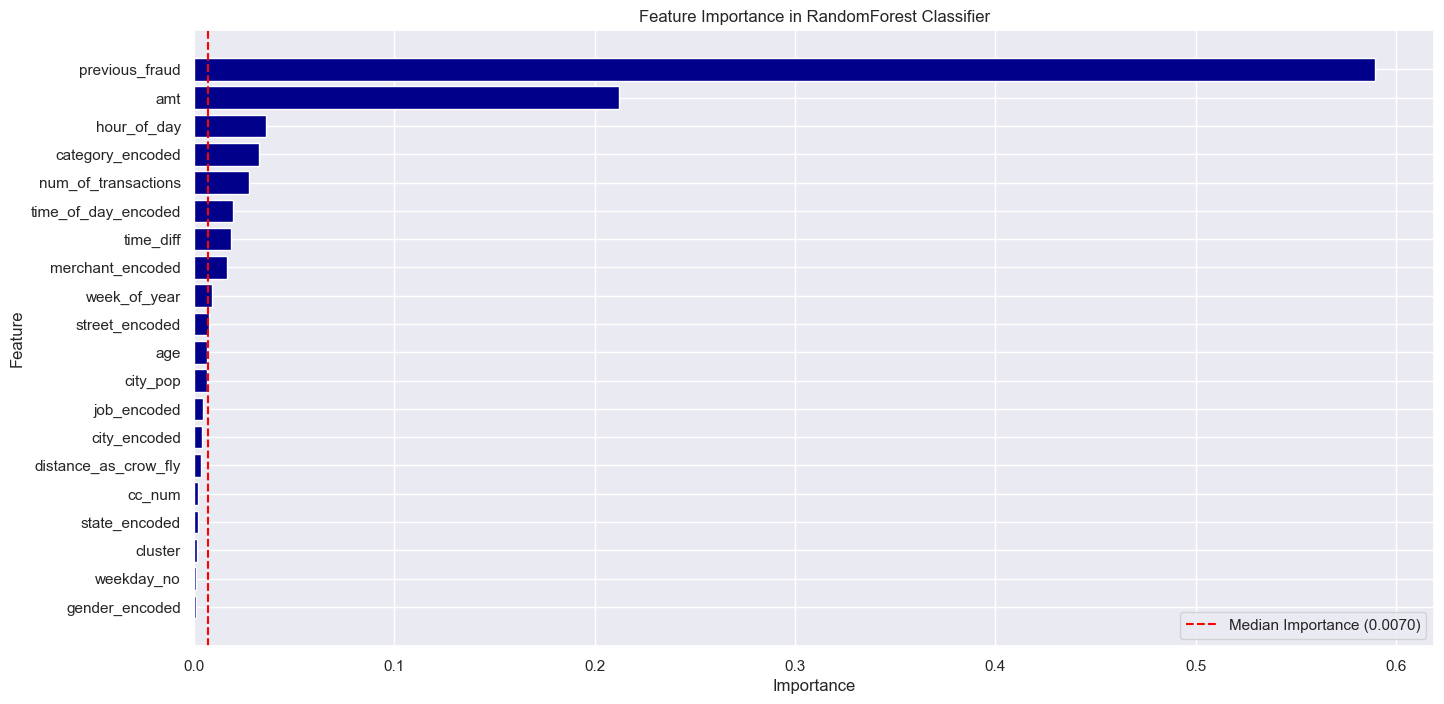

In [120]:
# Calculate the feature importances
importances = rf_model.feature_importances_

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Filter features with importance greater than or equal to the median
important_features = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

# Print the important features
print(f"Features with importance >= median importance ({median_importance:.4f}):")
print(important_features)

# Plotting the feature importance
plt.figure(figsize=(16, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.axvline(median_importance, color='red', linestyle='--', label=f"Median Importance ({median_importance:.4f})")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in RandomForest Classifier")
plt.legend(loc='lower right');
plt.savefig("Feature_Importance_RandomForest.png", dpi=150)

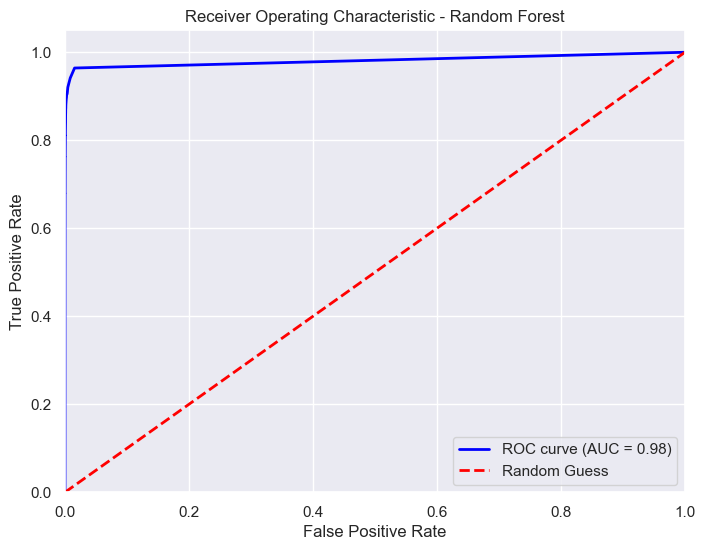

In [121]:
# Calculate ROC curve and AUC
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right');
plt.savefig("ROC_RandomForest.png", dpi=150)

#### LightGB model

In [122]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM model
lgb_model = LGBMClassifier(random_state=42, class_weight='balanced',max_features= None, learning_rate = 0.2, verbose=0)

# Perform cross-validation on the training set
lgb_cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("LightGB Cross-Validation Scores:", lgb_cv_scores)
print("Mean Cross-Validation Score:", lgb_cv_scores.mean())

# Fit GradientBoostingClassifier model
lgb_model.fit(X_train, y_train)

# Predict on test data
lgb_y_pred = lgb_model.predict(X_test)

# Calculate train and test accuracy
lgb_train_acc = lgb_model.score(X_train, y_train)
lgb_test_acc = accuracy_score(y_test, lgb_y_pred)

print(f"LightGB Train Accuracy: {lgb_train_acc:.4f}")
print(f"LightGB Test Accuracy: {lgb_test_acc:.4f}")

LightGB Cross-Validation Scores: [0.99894603 0.99867611 0.9988175  0.99886889 0.99890746]
Mean Cross-Validation Score: 0.998843196813279
LightGB Train Accuracy: 0.9998
LightGB Test Accuracy: 0.9989


In [123]:
params = lgb_model.get_params()
print(params)

{'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.2, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_features': None, 'verbose': 0}


In [124]:
# Make predictions on the test set
y_pred_prob = lgb_model.predict_proba(X_test)[:, 1]

# Initialize the list to store F1 scores and recall cores for different thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []
recall_scores = []

# Calculate F1 score and recall for each threshold
for threshold in thresholds:
    y_pred = (y_pred_prob > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_scores.append(f1)
    recall_scores.append(recall)

# Find the threshold with the highest F1 score
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
best_f1_score = f1_scores[best_threshold_idx]
best_recall = recall_scores[best_threshold_idx]

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1_score}")
print(f"Recall at best F1 score: {best_recall}")

# You can set a minimum recall requirement, for example 0.9
required_recall = 0.92
filtered_thresholds = [t for i, t in enumerate(thresholds) if recall_scores[i] >= required_recall]

if filtered_thresholds:
    optimal_threshold = filtered_thresholds[np.argmax([f1_scores[i] for i, t in enumerate(thresholds) if t in filtered_thresholds])]
    print(f"Optimal threshold with recall >= {required_recall}: {optimal_threshold}")
else:
    print(f"No threshold found with recall >= {required_recall}")

# Use the optimal threshold for prediction
lgb_y_pred = (y_pred_prob > optimal_threshold).astype(int)

Best threshold: 0.96
Best F1 score: 0.8906115417743324
Recall at best F1 score: 0.8420195439739414
Optimal threshold with recall >= 0.92: 0.62


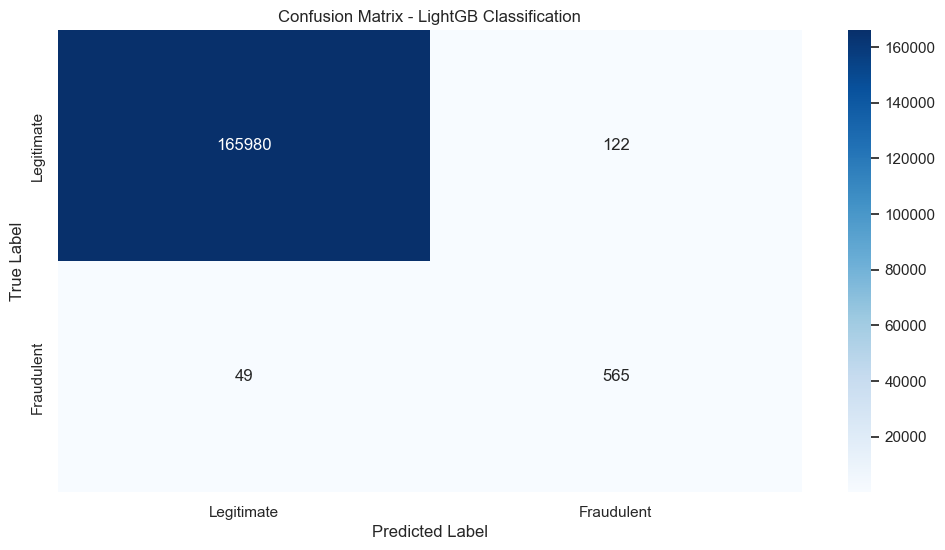

In [125]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, lgb_y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGB Classification');
plt.savefig("Confusion Matrix - LightGB.png", dpi=150)

In [126]:
# Print classification report
print("LightGB Classification Report:\n")
print(classification_report(y_test, lgb_y_pred))

LightGB Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166102
           1       0.82      0.92      0.87       614

    accuracy                           1.00    166716
   macro avg       0.91      0.96      0.93    166716
weighted avg       1.00      1.00      1.00    166716



Features with importance >= median importance (121.0000):
                Feature  Importance
0                cc_num         126
5          week_of_year         138
14     merchant_encoded         142
2              city_pop         158
7                   age         200
3           hour_of_day         219
9   num_of_transactions         245
19     category_encoded         245
6             time_diff         248
1                   amt         525


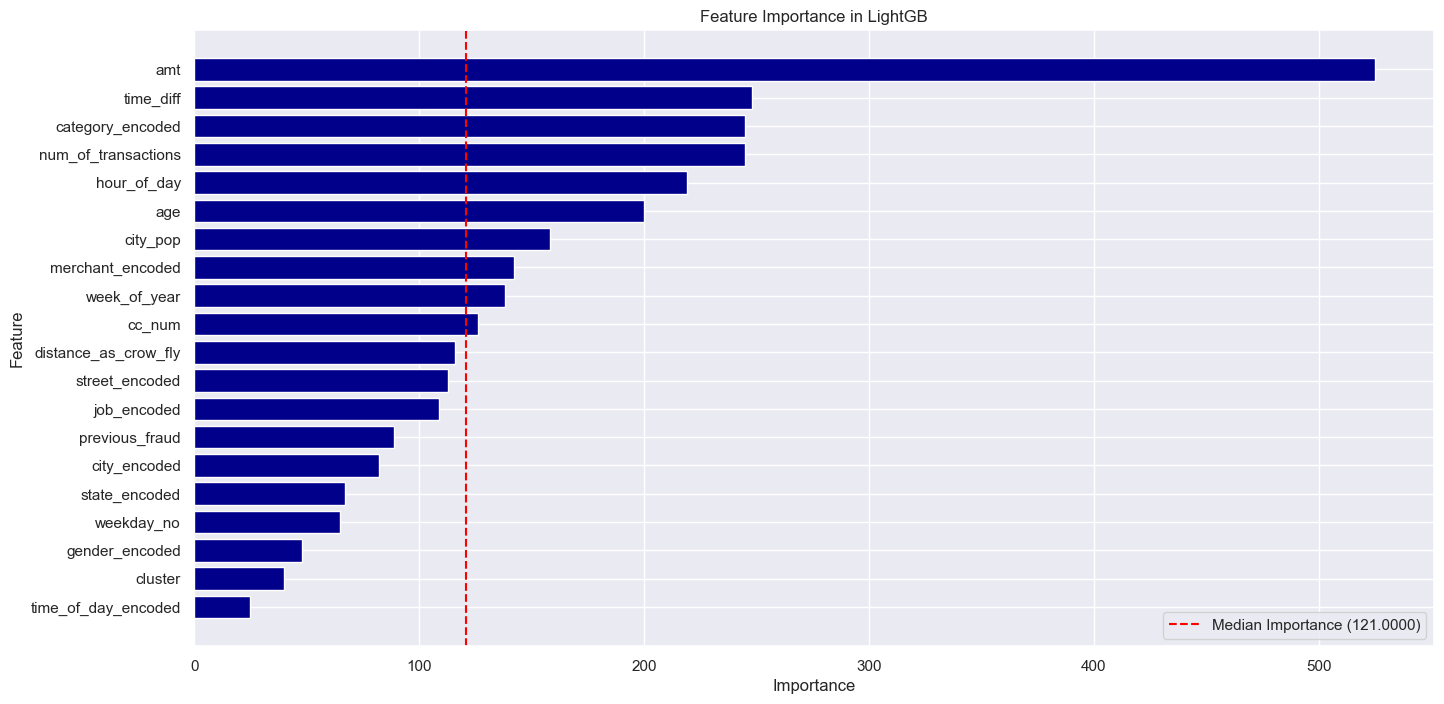

In [127]:
# Calculate the feature importances
importances = lgb_model.feature_importances_

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Filter features with importance greater than or equal to the median
important_features = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

# Print the important features
print(f"Features with importance >= median importance ({median_importance:.4f}):")
print(important_features)

# Plotting the feature importance
plt.figure(figsize=(16, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.axvline(median_importance, color='red', linestyle='--', label=f"Median Importance ({median_importance:.4f})")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in LightGB")
plt.legend(loc='lower right');
plt.savefig("Feature_Importance_LightGB.png", dpi=150)

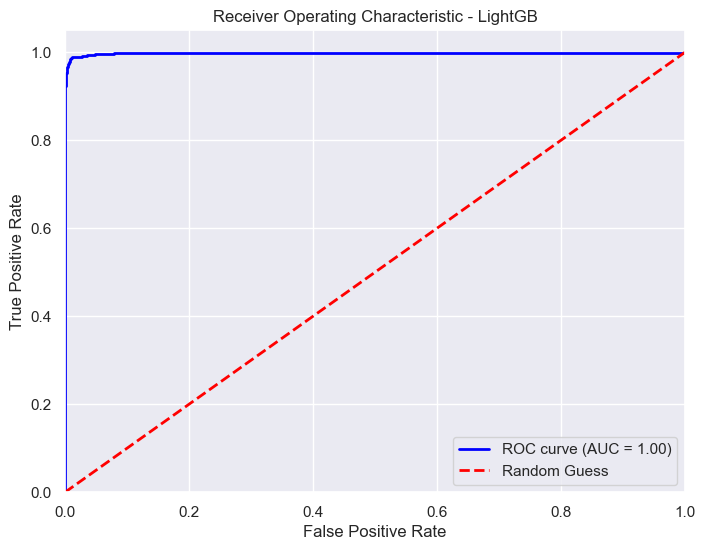

In [128]:
# Calculate ROC curve and AUC
lgb_y_prob = lgb_model.predict_proba(X_test)[:, 1]
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, lgb_y_prob)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_lgb)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LightGB')
plt.legend(loc='lower right');
plt.savefig("ROC_LightGB.png", dpi=150)

#### XGBClassifier

In [129]:
# Create a pipeline with OneHotEncoder and XGBClassifier
model_xgb = XGBClassifier(random_state=42, learning_rate = 0.5, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Perform cross-validation on the training set
xgb_cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=4)

# Print cross-validation scores
print("Gradient Boosting Cross-Validation Scores:", xgb_cv_scores)
print("Mean Cross-Validation Score:", xgb_cv_scores.mean())

# Fit the model
model_xgb.fit(X_train, y_train)

Gradient Boosting Cross-Validation Scores: [0.99938304 0.99928021 0.99920823 0.99922879]
Mean Cross-Validation Score: 0.9992750697391075


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [130]:
# Predict on test data
xgb_y_pred = model_xgb.predict(X_test)

# Calculate train and test accuracy
xgb_train_acc = model_xgb.score(X_train, y_train)
xgb_test_acc = accuracy_score(y_test, xgb_y_pred)

print(f"XGBoost Classifier Train Accuracy: {xgb_train_acc:.4f}")
print(f"XGBoost Classifier Test Accuracy: {xgb_test_acc:.4f}")

XGBoost Classifier Train Accuracy: 1.0000
XGBoost Classifier Test Accuracy: 0.9992


In [131]:
# Make predictions on the test set
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]

# Initialize the list to store F1 scores and recall cores for different thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []
recall_scores = []

# Calculate F1 score and recall for each threshold
for threshold in thresholds:
    y_pred = (y_pred_prob > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_scores.append(f1)
    recall_scores.append(recall)

# Find the threshold with the highest F1 score
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
best_f1_score = f1_scores[best_threshold_idx]
best_recall = recall_scores[best_threshold_idx]

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1_score}")
print(f"Recall at best F1 score: {best_recall}")

# You can set a minimum recall requirement, for example 0.9
required_recall = 0.91
filtered_thresholds = [t for i, t in enumerate(thresholds) if recall_scores[i] >= required_recall]

if filtered_thresholds:
    optimal_threshold = filtered_thresholds[np.argmax([f1_scores[i] for i, t in enumerate(thresholds) if t in filtered_thresholds])]
    print(f"Optimal threshold with recall >= {required_recall}: {optimal_threshold}")
else:
    print(f"No threshold found with recall >= {required_recall}")

# Use the optimal threshold for prediction
xgb_y_pred = (y_pred_prob > optimal_threshold).astype(int)

Best threshold: 0.67
Best F1 score: 0.9037037037037037
Recall at best F1 score: 0.8941368078175895
Optimal threshold with recall >= 0.91: 0.42


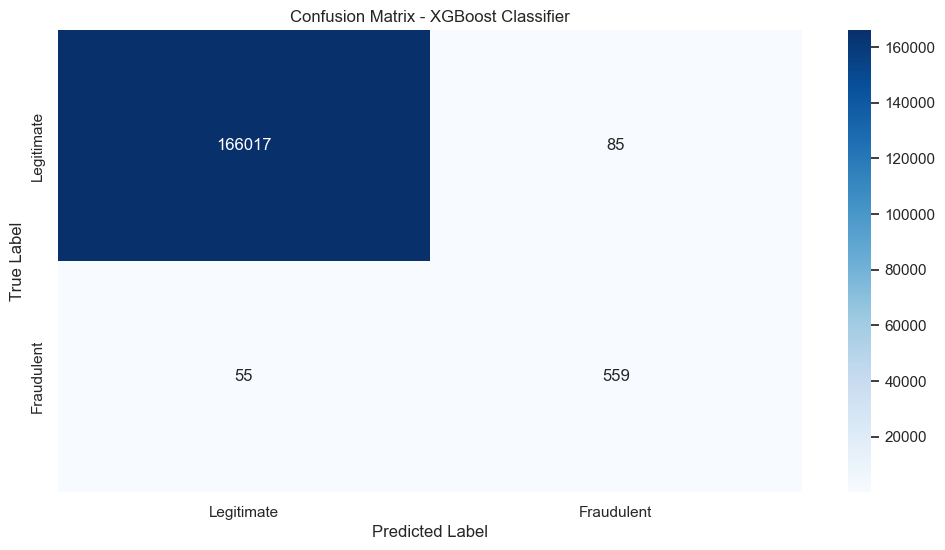

In [132]:
# Calculate confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(12, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost Classifier');
plt.savefig("Confusion Matrix - XGBoost.png", dpi=150)

In [133]:
# Print the classification report
report = classification_report(y_test, xgb_y_pred)
print(" XGBoost Classifier Classification Report:")
print(report)

 XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166102
           1       0.87      0.91      0.89       614

    accuracy                           1.00    166716
   macro avg       0.93      0.95      0.94    166716
weighted avg       1.00      1.00      1.00    166716



Features with importance >= median importance (0.0060):
                Feature  Importance
5          week_of_year    0.006694
14     merchant_encoded    0.006927
9   num_of_transactions    0.007072
17       street_encoded    0.007110
6             time_diff    0.007667
3           hour_of_day    0.016832
19     category_encoded    0.021500
1                   amt    0.041011
13  time_of_day_encoded    0.161570
8        previous_fraud    0.703257


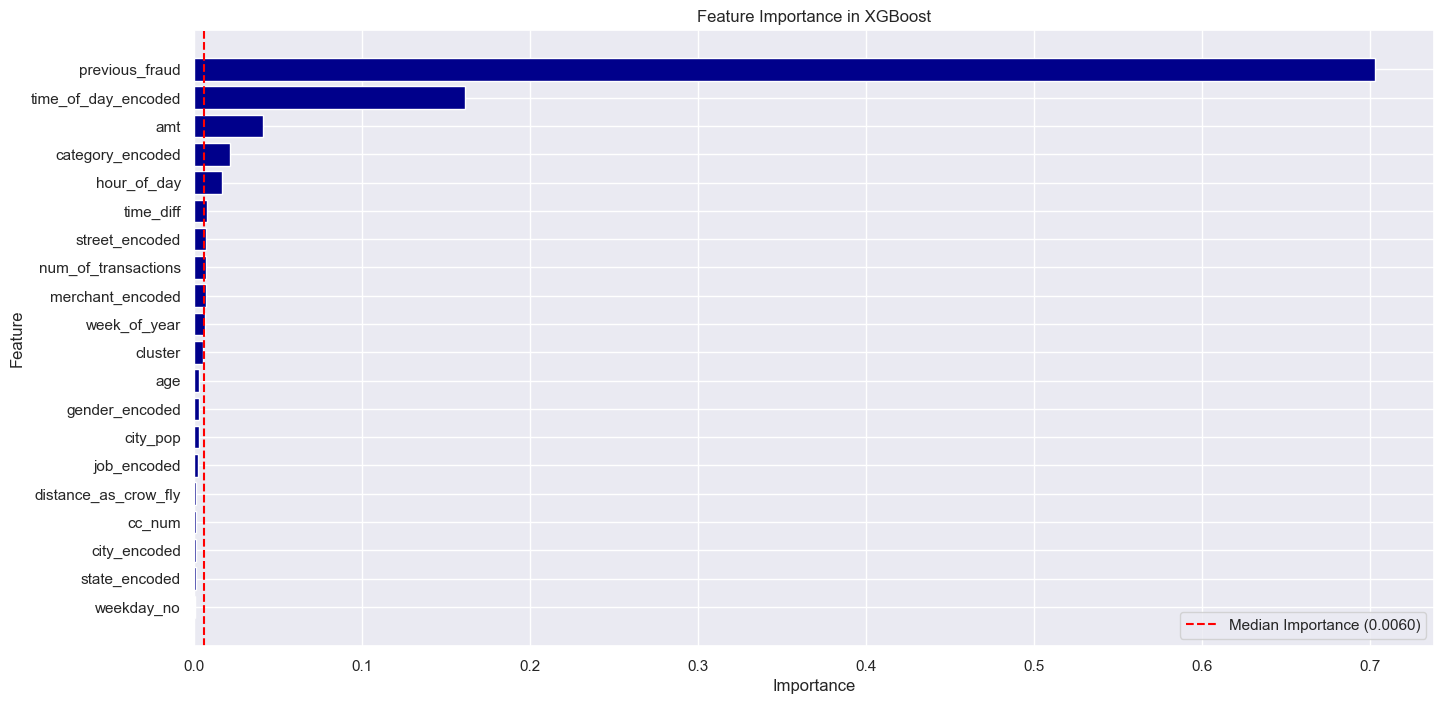

In [134]:
# Calculate the feature importances
importances = model_xgb.feature_importances_

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
# Assuming X_train is a pandas DataFrame
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Filter features with importance greater than or equal to the median
important_features = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

# Print the important features
print(f"Features with importance >= median importance ({median_importance:.4f}):")
print(important_features)

# Plotting the feature importance
plt.figure(figsize=(16, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.axvline(median_importance, color='red', linestyle='--', label=f"Median Importance ({median_importance:.4f})")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost")
plt.legend(loc='lower right');
plt.savefig("Feature_Importance_XGBoost.png", dpi=150)

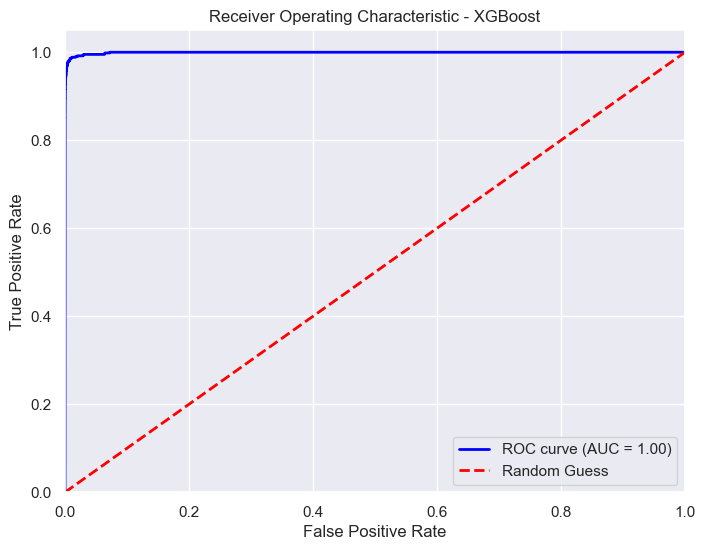

In [135]:
# Calculate ROC curve and AUC
xgb_y_prob = model_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_y_prob)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc='lower right');
plt.savefig("ROC_XGBoost.png", dpi=150)

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions and true labels for all models
predictions = {
    'random_forest': rf_y_pred,
    'lightgb': lgb_y_pred,
    'XGBoost': xgb_y_pred
}
# Probability predictions for ROC-AUC
prob_predictions = {
    'random_forest': rf_y_prob,
    'lightgb': lgb_y_prob,
    'XGBoost': xgb_y_prob
}
true_labels = y_test

# Initialize an empty DataFrame
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1score', 'ROC-AUC'])

# Fill the DataFrame with metrics for each model
for model_name, y_pred in predictions.items():
    metrics_df = metrics_df.append({
        'Model': model_name,
        'Accuracy': accuracy_score(true_labels, y_pred),
        'Precision': precision_score(true_labels, y_pred),
        'Recall': recall_score(true_labels, y_pred),
        'F1score': f1_score(true_labels, y_pred),
        'ROC-AUC': roc_auc_score(true_labels, prob_predictions[model_name])
    }, ignore_index=True)

# Sort the DataFrame by F1score in descending order
metrics_df.sort_values(by='Recall', ascending=False, inplace=True)


# Display the DataFrame
metrics_df

Model  Accuracy  Precision    Recall   F1score   ROC-AUC
1        lightgb  0.998974   0.822416  0.920195  0.868563  0.997637
2        XGBoost  0.999160   0.868012  0.910423  0.888712  0.999284
0  random_forest  0.998530   0.778281  0.840391  0.808144  0.981163

### Weighted Averaging

In [137]:
# Define weights for the models
lgb_weight = 0.5
xgb_weight = 0.5

# Weighted average of the predictions
ensemble_prob_weighted = (lgb_weight * lgb_y_prob + xgb_weight * xgb_y_prob)

# Convert probabilities to binary predictions based on a threshold of 0.5
ensemble_pred_weighted = (ensemble_prob_weighted >= 0.4).astype(int)

# Evaluate the weighted ensemble model
accuracy_weighted = accuracy_score(y_test, ensemble_pred_weighted)
precision_weighted = precision_score(y_test, ensemble_pred_weighted)
recall_weighted = recall_score(y_test, ensemble_pred_weighted)
f1_weighted = f1_score(y_test, ensemble_pred_weighted)
roc_auc_weighted = roc_auc_score(y_test, ensemble_prob_weighted)

# Create a DataFrame to store the metrics
ensemble_metrics_weighted_df = pd.DataFrame([{
    'Model': 'Weighted LightGBM + XGBoost',
    'Accuracy': accuracy_weighted,
    'Precision': precision_weighted,
    'Recall': recall_weighted,
    'F1score': f1_weighted,
    'ROC-AUC': roc_auc_weighted
}])

# Display the DataFrame
ensemble_metrics_weighted_df

Model  Accuracy  Precision    Recall   F1score  \
0  Weighted LightGBM + XGBoost  0.999082   0.834543  0.936482  0.882579   

    ROC-AUC  
0  0.999399

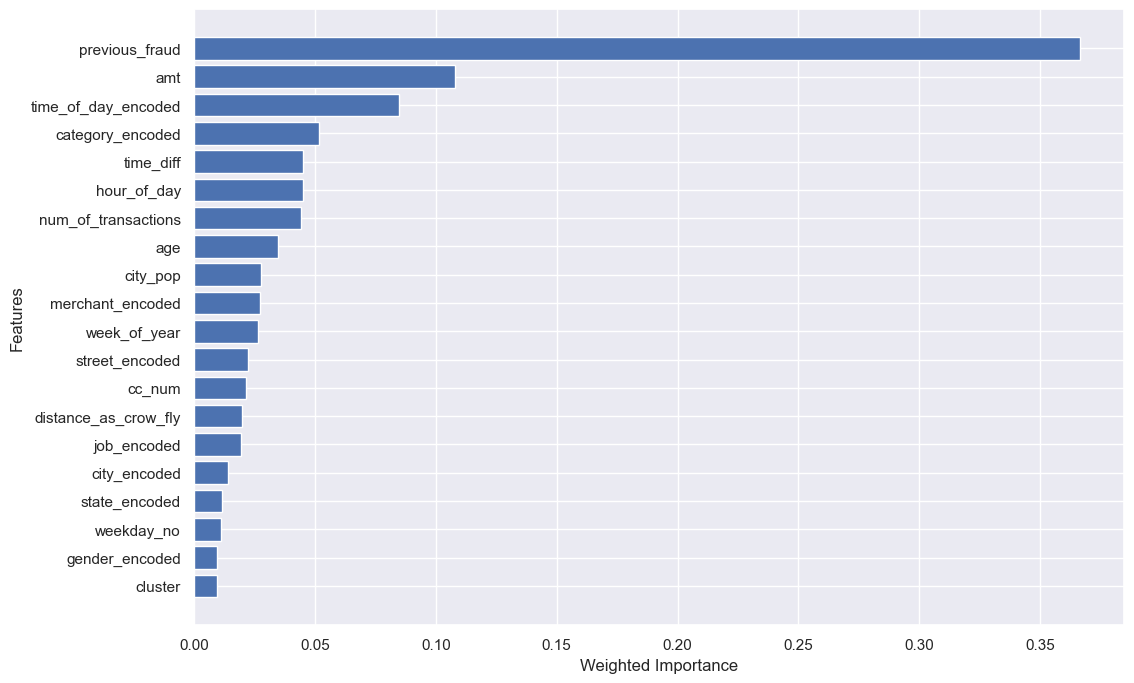

In [138]:
# Assuming lgb_model and xgb_model are your trained models
lgb_importances = lgb_model.feature_importances_
xgb_importances = model_xgb.feature_importances_

# Normalize the importances
lgb_importances = lgb_importances / np.sum(lgb_importances)
xgb_importances = xgb_importances / np.sum(xgb_importances)

# Weighted average of importances
weighted_importances = lgb_weight * lgb_importances + xgb_weight * xgb_importances

# Sort the feature importances
features = X_train.columns
indices = np.argsort(weighted_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
# plt.title("Feature Importances (Weighted Average from LightGBM and XGBoost)")
plt.barh(range(X_train.shape[1]), weighted_importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), features[indices])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.xlabel('Weighted Importance')
plt.ylabel('Features');
plt.savefig("Feature Importance_Weighted Average Model.png", dpi=150)

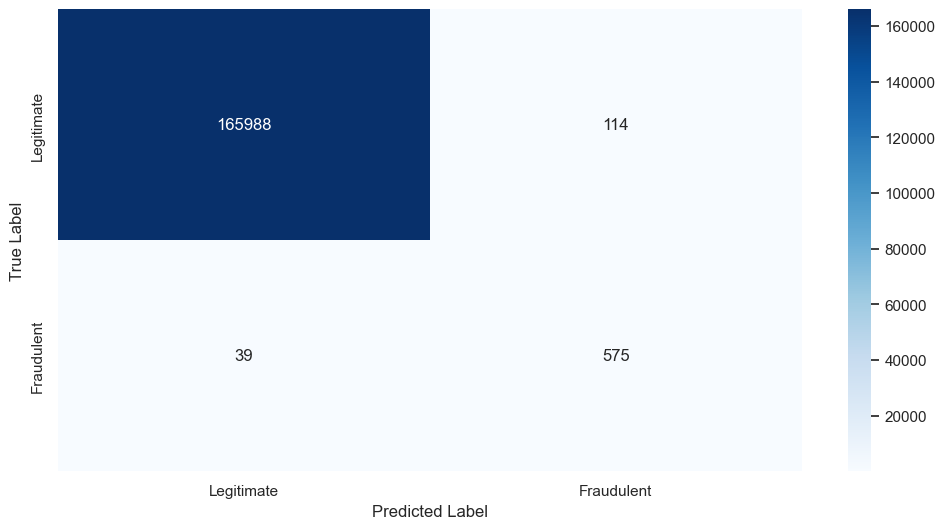

In [139]:
# Calculate confusion matrix
cm_xgb = confusion_matrix(y_test, ensemble_pred_weighted)

# Plot confusion matrix with custom labels
plt.figure(figsize=(12, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.title('Confusion Matrix  for Weighted Average Model');
plt.savefig("Confusion Matrix_Weighted Average Model.png", dpi=150)

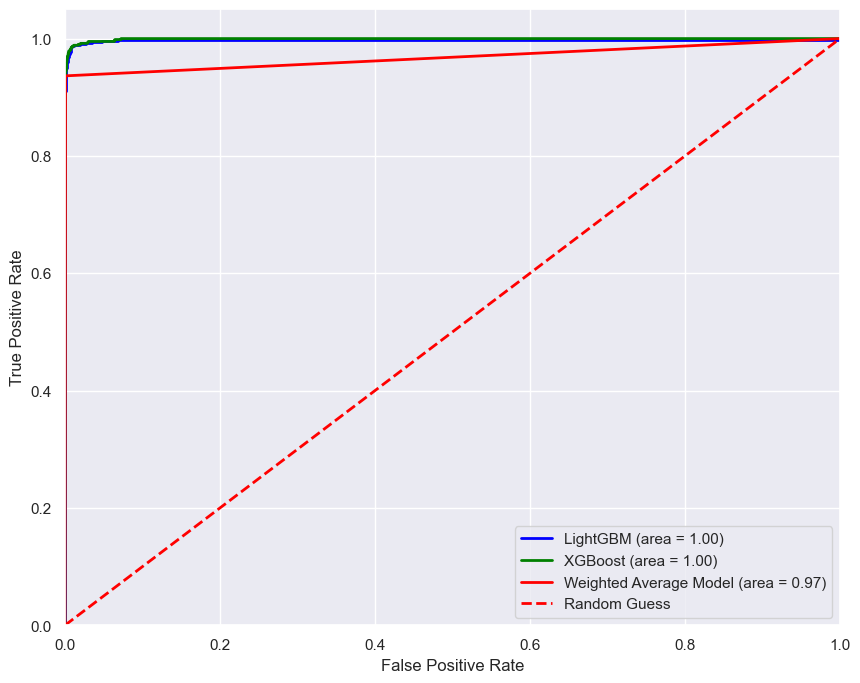

In [140]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC for each model
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_y_prob)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_y_prob)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Compute the ROC curve and AUC for the weighted average model
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, ensemble_pred_weighted)
roc_auc_weighted = auc(fpr_weighted, tpr_weighted)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lgb, tpr_lgb, color='blue', lw=2, label='LightGBM (area = %0.2f)' % roc_auc_lgb)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_weighted, tpr_weighted, color='red', lw=2, label='Weighted Average Model (area = %0.2f)' % roc_auc_weighted)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right");
plt.savefig("ROC Curve_Weighted Average Model.png", dpi=150)